<a href="https://colab.research.google.com/github/Roberto-he/TFM_RHG/blob/main/TFM_FIRE_RHG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJETIVO 

El objetivo de este proyecto es predecir los incendios que se producen en Londres.





#LIBRERIAS

In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import sqlite3
import seaborn as sns
from matplotlib import pyplot
from functools import reduce
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


#CARGA DE DATASET DE GRAN TAMANYO EN GOOGLE DRIVE

##CONVERSION DEL DATASET A CSV

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
def upload_files_xls ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_excel(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
df1 = upload_files_xls()
df1.head()

NameError: ignored

In [ ]:
df2 = upload_files_xls()
df2.head()

In [ ]:
df3 = upload_files_xls()
df3.head()

##UNION DE LOS DATASETS

In [ ]:
#Unir las 3 bases de datos
frames = [df1, df2, df3]

df_excel = pd.concat(frames)

In [ ]:
#Pasar a CSV
df_excel.to_csv('LFB incident 2009-2021.csv', index=False)

In [ ]:
#Exportar CSV

from google.colab import files

with open('LFB incident 2009-2021.csv', 'w') as f:
  df.to_csv(f,  index = False)
  

files.download('LFB incident 2009-2021.csv')

df.head()

In [ ]:
df=pd.read_csv("LFB incident 2009-2021.csv")
df

## UNZIP
Al ser un archivo muy pesado lo subo a ggole colab comprimido. Ya en colab lo descomprimo

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!unrar x  '/gdrive/My Drive/TFM-Roberto_Hernandez/LFB_incident_2009-2021.rar'  "/gdrive/My Drive/TFM-Roberto_Hernandez/"


#CARGA DATASETS

##DATASET INCENDIOS

In [ ]:
#Url: https://data.gov.uk/dataset/e6b9d1c6-7c34-42ca-a100-cd62164ea76c/london-fire-brigade-incident-records
llamadas = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/LFB incident 2009-2021.csv')
llamadas_test=pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/LFB incident 2009-2021.csv')
llamadas_vis=llamadas
llamadas

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


IncidentNumber  DateOfCall  ...  PumpHoursRoundUp Notional Cost (£)
0              235138081  2009-01-01  ...               NaN               NaN
1                   1091  2009-01-01  ...               NaN               NaN
2                   2091  2009-01-01  ...               NaN               NaN
3                   3091  2009-01-01  ...               NaN               NaN
4                   5091  2009-01-01  ...               NaN               NaN
...                  ...         ...  ...               ...               ...
1333065  050590-30042021  2021-04-30  ...               1.0             352.0
1333066  050431-30042021  2021-04-30  ...               1.0             352.0
1333067  050653-30042021  2021-04-30  ...               1.0             352.0
1333068  050428-30042021  2021-04-30  ...               1.0             352.0
1333069  050249-30042021  2021-04-30  ...               1.0             352.0

[1333070 rows x 38 columns]

In [ ]:
#Vemos la aparte de abajo de nuestro dataset
llamadas.tail()


IncidentNumber  DateOfCall  ...  PumpHoursRoundUp Notional Cost (£)
1333065  050590-30042021  2021-04-30  ...               1.0             352.0
1333066  050431-30042021  2021-04-30  ...               1.0             352.0
1333067  050653-30042021  2021-04-30  ...               1.0             352.0
1333068  050428-30042021  2021-04-30  ...               1.0             352.0
1333069  050249-30042021  2021-04-30  ...               1.0             352.0

[5 rows x 38 columns]

In [ ]:
# tamanyo del dataset
llamadas.shape

(1333070, 38)

In [ ]:
# Informacion asociada al dataset
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333070 entries, 0 to 1333069
Data columns (total 38 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1333070 non-null  object 
 1   DateOfCall                              1333070 non-null  object 
 2   CalYear                                 1333070 non-null  int64  
 3   TimeOfCall                              1333070 non-null  object 
 4   HourOfCall                              1333070 non-null  int64  
 5   IncidentGroup                           1333069 non-null  object 
 6   StopCodeDescription                     1333069 non-null  object 
 7   SpecialServiceType                      408181 non-null   object 
 8   PropertyCategory                        1333069 non-null  object 
 9   PropertyType                            1333069 non-null  object 
 10  AddressQualifier              

###ANALISIS DE DATOS

In [ ]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [ ]:
descripcionDatosDataset(llamadas)

Cantidad de filas: 1333070
Cantidad de columnas: 38
----------------------------------------------------------------------------------------------------
Columna: IncidentNumber
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): [235138081 1091 2091 3091 5091 6091 8091 9091 10091 11091]
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: DateOfCall
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['2009-01-01' '2009-01-02' '2009-01-03' '2009-01-04' '2009-01-05'
 '2009-01-06' '2009-01-07' '2009-01-08' '2009-01-09' '2009-01-10']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: CalYear
Tipo de datos: numérico
Descripción de valores:
min       2009.000000
max       2021.000000
mean      2014.398667
std          3.632486
median    2014.000000
Name

###LIMPIEZA

In [ ]:
#Borramos los atributos posteriores a la llamdas que no aportan nada en nuestro estudio
col_eliminar_llamadas=["TimeOfCall","IncidentStationGround","IncGeo_WardName","IncGeo_BoroughName",
                       "FirstPumpArriving_AttendanceTime","FirstPumpArriving_DeployedFromStation",
                       "SecondPumpArriving_AttendanceTime","Easting_m","Northing_m","SecondPumpArriving_DeployedFromStation",
                       "NumStationsWithPumpsAttending","NumPumpsAttending","PumpHoursRoundUp","PumpCount","Notional Cost (£)"]
llamadas.drop(col_eliminar_llamadas, inplace=True, axis=1)
llamadas_test.drop(col_eliminar_llamadas, inplace=True, axis=1)
llamadas

IncidentNumber  DateOfCall  CalYear  ...        USRN   Latitude Longitude
0              235138081  2009-01-01     2009  ...         NaN        NaN       NaN
1                   1091  2009-01-01     2009  ...         NaN        NaN       NaN
2                   2091  2009-01-01     2009  ...         NaN        NaN       NaN
3                   3091  2009-01-01     2009  ...         NaN        NaN       NaN
4                   5091  2009-01-01     2009  ...         NaN        NaN       NaN
...                  ...         ...      ...  ...         ...        ...       ...
1333065  050590-30042021  2021-04-30     2021  ...  20400412.0        NaN       NaN
1333066  050431-30042021  2021-04-30     2021  ...  22004367.0  51.488022 -0.038628
1333067  050653-30042021  2021-04-30     2021  ...  22832450.0  51.573868 -0.014799
1333068  050428-30042021  2021-04-30     2021  ...  20801074.0  51.469960 -0.016181
1333069  050249-30042021  2021-04-30     2021  ...  20101032.0  51.427664  0.138471

[1333070 rows x 23 columns]

In [ ]:
#Convertir columna de incidentes en tres columnas numerales para poder contabilizarlos
r=[]
p=[]
s=[]
for i in llamadas["IncidentGroup"]:
    if i=="Fire":
     p.append(1)
     r.append(0)
     s.append(0)
    elif i== "False Alarm":
     p.append(0)
     r.append(1)
     s.append(0)
    else:
     p.append(0)
     r.append(0)
     s.append(1)  

llamadas["Num_Fire"]=p
llamadas["Num_Falsa_A"]=r
llamadas["Num_Service"]=s
llamadas.drop("IncidentGroup", inplace=True, axis=1)
llamadas

IncidentNumber  DateOfCall  ...  Num_Falsa_A  Num_Service
0              235138081  2009-01-01  ...            0            1
1                   1091  2009-01-01  ...            0            1
2                   2091  2009-01-01  ...            0            0
3                   3091  2009-01-01  ...            0            0
4                   5091  2009-01-01  ...            0            0
...                  ...         ...  ...          ...          ...
1333065  050590-30042021  2021-04-30  ...            0            1
1333066  050431-30042021  2021-04-30  ...            0            0
1333067  050653-30042021  2021-04-30  ...            0            0
1333068  050428-30042021  2021-04-30  ...            0            0
1333069  050249-30042021  2021-04-30  ...            0            1

[1333070 rows x 25 columns]

In [ ]:
#Convertir columna de incidentes en tres columnas numerales para poder contabilizarlos
r=[]
p=[]
s=[]
for i in llamadas_test["IncidentGroup"]:
    if i=="Fire":
     p.append(1)
     r.append(0)
     s.append(0)
    elif i== "False Alarm":
     p.append(0)
     r.append(1)
     s.append(0)
    else:
     p.append(0)
     r.append(0)
     s.append(1)  

llamadas_test["Num_Fire"]=p
llamadas_test["Num_Falsa_A"]=r
llamadas_test["Num_Service"]=s

llamadas_test.drop("IncidentGroup", inplace=True, axis=1)
llamadas_test

IncidentNumber  DateOfCall  ...  Num_Falsa_A  Num_Service
0              235138081  2009-01-01  ...            0            1
1                   1091  2009-01-01  ...            0            1
2                   2091  2009-01-01  ...            0            0
3                   3091  2009-01-01  ...            0            0
4                   5091  2009-01-01  ...            0            0
...                  ...         ...  ...          ...          ...
1333065  050590-30042021  2021-04-30  ...            0            1
1333066  050431-30042021  2021-04-30  ...            0            0
1333067  050653-30042021  2021-04-30  ...            0            0
1333068  050428-30042021  2021-04-30  ...            0            0
1333069  050249-30042021  2021-04-30  ...            0            1

[1333070 rows x 25 columns]

In [ ]:
llamadas_test

IncidentNumber  DateOfCall  ...  Num_Falsa_A  Num_Service
0              235138081  2009-01-01  ...            0            1
1                   1091  2009-01-01  ...            0            1
2                   2091  2009-01-01  ...            0            0
3                   3091  2009-01-01  ...            0            0
4                   5091  2009-01-01  ...            0            0
...                  ...         ...  ...          ...          ...
1333065  050590-30042021  2021-04-30  ...            0            1
1333066  050431-30042021  2021-04-30  ...            0            0
1333067  050653-30042021  2021-04-30  ...            0            0
1333068  050428-30042021  2021-04-30  ...            0            0
1333069  050249-30042021  2021-04-30  ...            0            1

[1333070 rows x 25 columns]

In [ ]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333070 entries, 0 to 1333069
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   IncidentNumber       1333070 non-null  object 
 1   DateOfCall           1333070 non-null  object 
 2   CalYear              1333070 non-null  int64  
 3   HourOfCall           1333070 non-null  int64  
 4   StopCodeDescription  1333069 non-null  object 
 5   SpecialServiceType   408181 non-null   object 
 6   PropertyCategory     1333069 non-null  object 
 7   PropertyType         1333069 non-null  object 
 8   AddressQualifier     1333070 non-null  object 
 9   Postcode_full        703227 non-null   object 
 10  Postcode_district    1333070 non-null  object 
 11  IncGeo_BoroughCode   1333070 non-null  object 
 12  ProperCase           1333070 non-null  object 
 13  IncGeo_WardCode      1333070 non-null  object 
 14  IncGeo_WardNameNew   1333070 non-null  object 
 15

In [ ]:
llamadas= llamadas.loc[(llamadas["CalYear"]>=2009)&(llamadas["CalYear"]<=2014)]

llamadas_test= llamadas_test.loc[(llamadas_test["CalYear"]>=2015)&(llamadas_test["CalYear"]<=2015)]
llamadas_test

IncidentNumber  DateOfCall  ...  Num_Falsa_A  Num_Service
685252             1151  2015-01-01  ...            0            1
685253             4151  2015-01-01  ...            0            0
685254             3151  2015-01-01  ...            1            0
685255             8151  2015-01-01  ...            0            0
685256            10151  2015-01-01  ...            0            1
...                 ...         ...  ...          ...          ...
783600  179176-31122015  2015-12-31  ...            0            1
783601  179177-31122015  2015-12-31  ...            0            1
783602  179179-31122015  2015-12-31  ...            0            0
783603  179180-31122015  2015-12-31  ...            0            0
783604  179181-31122015  2015-12-31  ...            0            0

[98353 rows x 25 columns]

In [ ]:
#llamadas.groupby(["DateOfCall"]).agg(lambda x: set(x))
llamadas=llamadas.groupby(["DateOfCall","IncGeo_WardNameNew"]).agg({"CalYear":'first', "Postcode_full": "first",'Postcode_district':'first', 
                                                           "IncGeo_BoroughCode":"first", "ProperCase": "first", "IncGeo_WardCode": "first",
                                                           "Easting_rounded":"mean", "Northing_rounded":"mean","UPRN": 'mean', "USRN": "mean",
                                                           "Latitude": "mean", "Longitude":"mean", "Num_Fire":"sum", "Num_Falsa_A":"sum",
                                                           "Num_Service":"sum"}).reset_index()

llamadas_test=llamadas_test.groupby(["DateOfCall","IncGeo_WardNameNew"]).agg({"CalYear":'first', "Postcode_full": "first",'Postcode_district':'first', 
                                                           "IncGeo_BoroughCode":"first", "ProperCase": "first", "IncGeo_WardCode": "first",
                                                           "Easting_rounded":"mean", "Northing_rounded":"mean","UPRN": 'mean', "USRN": "mean",
                                                           "Latitude": "mean", "Longitude":"mean", "Num_Fire":"sum", "Num_Falsa_A":"sum",
                                                           "Num_Service":"sum"}).reset_index()


In [ ]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477809 entries, 0 to 477808
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DateOfCall          477809 non-null  object 
 1   IncGeo_WardNameNew  477809 non-null  object 
 2   CalYear             477809 non-null  int64  
 3   Postcode_full       285577 non-null  object 
 4   Postcode_district   477809 non-null  object 
 5   IncGeo_BoroughCode  477809 non-null  object 
 6   ProperCase          477809 non-null  object 
 7   IncGeo_WardCode     477809 non-null  object 
 8   Easting_rounded     477809 non-null  float64
 9   Northing_rounded    477809 non-null  float64
 10  UPRN                0 non-null       float64
 11  USRN                0 non-null       float64
 12  Latitude            0 non-null       float64
 13  Longitude           0 non-null       float64
 14  Num_Fire            477809 non-null  int64  
 15  Num_Falsa_A         477809 non-nul

In [ ]:
#Renombramos las columnas para poder hacer las uniones entre los distintos datasets
llamadas=llamadas.rename(columns={"IncGeo_BoroughCode":"Code", "CalYear":"Year"})
llamadas_test=llamadas_test.rename(columns={"IncGeo_BoroughCode":"Code", "CalYear":"Year"})
llamadas

DateOfCall       IncGeo_WardNameNew  ...  Num_Falsa_A Num_Service
0       2009-01-01                    Abbey  ...            0           0
1       2009-01-01               Abbey Road  ...            1           0
2       2009-01-01                  Addison  ...            0           1
3       2009-01-01               Aldborough  ...            0           1
4       2009-01-01                Alexandra  ...            0           1
...            ...                      ...  ...          ...         ...
477804  2014-12-31                  Whitton  ...            1           0
477805  2014-12-31           Wimbledon Park  ...            1           0
477806  2014-12-31           Woodberry Down  ...            5           0
477807  2014-12-31                 Woodside  ...            1           0
477808  2014-12-31  Wormholt and White City  ...            3           0

[477809 rows x 17 columns]

In [ ]:
llamadas["Code"].unique()

array(['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000001', 'E09000012',
       'E09000016', 'E09000024', 'E09000009', 'E00000000'], dtype=object)

In [ ]:
llamadas["Code_true"]= llamadas["Code"].str.contains('E09', na=False)
llamadas=llamadas.loc[(llamadas["Code_true"]==True)]
llamadas.drop("Code_true", inplace=True, axis=1)

#Dataset para el test
llamadas_test["Code_true"]= llamadas_test["Code"].str.contains('E09', na=False)
llamadas_test=llamadas_test.loc[(llamadas_test["Code_true"]==True)]
llamadas_test.drop("Code_true", inplace=True, axis=1)

llamadas

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


DateOfCall       IncGeo_WardNameNew  ...  Num_Falsa_A Num_Service
0       2009-01-01                    Abbey  ...            0           0
1       2009-01-01               Abbey Road  ...            1           0
2       2009-01-01                  Addison  ...            0           1
3       2009-01-01               Aldborough  ...            0           1
4       2009-01-01                Alexandra  ...            0           1
...            ...                      ...  ...          ...         ...
477804  2014-12-31                  Whitton  ...            1           0
477805  2014-12-31           Wimbledon Park  ...            1           0
477806  2014-12-31           Woodberry Down  ...            5           0
477807  2014-12-31                 Woodside  ...            1           0
477808  2014-12-31  Wormholt and White City  ...            3           0

[476218 rows x 17 columns]

In [ ]:
llamadas=llamadas.loc[(llamadas["Code"]!="E09000001")]

llamadas_test=llamadas_test.loc[(llamadas_test["Code"]!="E09000001")]

In [ ]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469277 entries, 0 to 477808
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DateOfCall          469277 non-null  object 
 1   IncGeo_WardNameNew  469277 non-null  object 
 2   Year                469277 non-null  int64  
 3   Postcode_full       277728 non-null  object 
 4   Postcode_district   469277 non-null  object 
 5   Code                469277 non-null  object 
 6   ProperCase          469277 non-null  object 
 7   IncGeo_WardCode     469277 non-null  object 
 8   Easting_rounded     469277 non-null  float64
 9   Northing_rounded    469277 non-null  float64
 10  UPRN                0 non-null       float64
 11  USRN                0 non-null       float64
 12  Latitude            0 non-null       float64
 13  Longitude           0 non-null       float64
 14  Num_Fire            469277 non-null  int64  
 15  Num_Falsa_A         469277 non-nul

In [ ]:
# Buscamos valores perdidos
null_columns=llamadas.columns[llamadas.isnull().any()]
llamadas[null_columns].isnull().sum()

Postcode_full    191549
UPRN             469277
USRN             469277
Latitude         469277
Longitude        469277
dtype: int64

In [ ]:
col_eliminar_llamadas=["UPRN","USRN","Latitude","Longitude"]#,"Postcode_full" ]

llamadas.drop(col_eliminar_llamadas, inplace=True, axis=1)

llamadas_test.drop(col_eliminar_llamadas, inplace=True, axis=1)

llamadas

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


DateOfCall       IncGeo_WardNameNew  ...  Num_Falsa_A Num_Service
0       2009-01-01                    Abbey  ...            0           0
1       2009-01-01               Abbey Road  ...            1           0
2       2009-01-01                  Addison  ...            0           1
3       2009-01-01               Aldborough  ...            0           1
4       2009-01-01                Alexandra  ...            0           1
...            ...                      ...  ...          ...         ...
477804  2014-12-31                  Whitton  ...            1           0
477805  2014-12-31           Wimbledon Park  ...            1           0
477806  2014-12-31           Woodberry Down  ...            5           0
477807  2014-12-31                 Woodside  ...            1           0
477808  2014-12-31  Wormholt and White City  ...            3           0

[469277 rows x 13 columns]

In [ ]:
#Cambio el formato de la fercha de los crimenes solo no interesa el anyo
llamadas["Mes"]=llamadas["DateOfCall"].map(lambda x: str(x)[5:-3])
llamadas["Dia"]=llamadas["DateOfCall"].map(lambda x: str(x)[8:])
llamadas.drop("DateOfCall", inplace=True, axis=1)

llamadas_test["Mes"]=llamadas_test["DateOfCall"].map(lambda x: str(x)[5:-3])
llamadas_test["Dia"]=llamadas_test["DateOfCall"].map(lambda x: str(x)[8:])
llamadas_test.drop("DateOfCall", inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [ ]:
# Buscamos valores perdidos
null_columns=llamadas.columns[llamadas.isnull().any()]
llamadas[null_columns].isnull().sum()

Postcode_full    191549
dtype: int64

In [ ]:
is_NaN = llamadas.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = llamadas[row_has_NaN]
rows_with_NaN

IncGeo_WardNameNew  Year Postcode_full  ... Num_Service Mes Dia
1                     Abbey Road  2009          None  ...           0  01  01
2                        Addison  2009          None  ...           1  01  01
3                     Aldborough  2009          None  ...           1  01  01
5                         Alibon  2009          None  ...           0  01  01
6       Avonmore and Brook Green  2009          None  ...           0  01  01
...                          ...   ...           ...  ...         ...  ..  ..
477798           Wembley Central  2014          None  ...           0  12  31
477800             West Finchley  2014          None  ...           0  12  31
477801            West Hampstead  2014          None  ...           1  12  31
477803               Whitechapel  2014          None  ...           0  12  31
477804                   Whitton  2014          None  ...           0  12  31

[191549 rows x 14 columns]

In [ ]:
llamadas["Mes"]=llamadas["Mes"].astype(int)
llamadas["Dia"]=llamadas["Dia"].astype(int)
llamadas["Year"]=llamadas["Year"].astype(int)
llamadas["Postcode_district"]=llamadas["Postcode_district"].astype(str)
llamadas["Code"]=llamadas["Code"].astype(str)
llamadas["ProperCase"]=llamadas["ProperCase"].astype(str)
llamadas["IncGeo_WardCode"]=llamadas["IncGeo_WardCode"].astype(str)
llamadas["IncGeo_WardNameNew"]=llamadas["IncGeo_WardNameNew"].astype(str)
llamadas["Easting_rounded"]=llamadas["Easting_rounded"].astype(int)
llamadas["Northing_rounded"]=llamadas["Northing_rounded"].astype(int)

llamadas.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469277 entries, 0 to 477808
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   IncGeo_WardNameNew  469277 non-null  object
 1   Year                469277 non-null  int64 
 2   Postcode_full       277728 non-null  object
 3   Postcode_district   469277 non-null  object
 4   Code                469277 non-null  object
 5   ProperCase          469277 non-null  object
 6   IncGeo_WardCode     469277 non-null  object
 7   Easting_rounded     469277 non-null  int64 
 8   Northing_rounded    469277 non-null  int64 
 9   Num_Fire            469277 non-null  int64 
 10  Num_Falsa_A         469277 non-null  int64 
 11  Num_Service         469277 non-null  int64 
 12  Mes                 469277 non-null  int64 
 13  Dia                 469277 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 53.7+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
llamadas_test["Mes"]=llamadas_test["Mes"].astype(int)
llamadas_test["Dia"]=llamadas_test["Dia"].astype(int)
llamadas_test["Year"]=llamadas_test["Year"].astype(int)
llamadas_test["Postcode_district"]=llamadas_test["Postcode_district"].astype(str)
llamadas_test["Code"]=llamadas_test["Code"].astype(str)
llamadas_test["ProperCase"]=llamadas_test["ProperCase"].astype(str)
llamadas_test["IncGeo_WardCode"]=llamadas_test["IncGeo_WardCode"].astype(str)
llamadas_test["IncGeo_WardNameNew"]=llamadas_test["IncGeo_WardNameNew"].astype(str)
llamadas_test["Easting_rounded"]=llamadas_test["Easting_rounded"].astype(int)
llamadas_test["Northing_rounded"]=llamadas_test["Northing_rounded"].astype(int)

llamadas_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71167 entries, 0 to 72520
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   IncGeo_WardNameNew  71167 non-null  object
 1   Year                71167 non-null  int64 
 2   Postcode_full       40651 non-null  object
 3   Postcode_district   71167 non-null  object
 4   Code                71167 non-null  object
 5   ProperCase          71167 non-null  object
 6   IncGeo_WardCode     71167 non-null  object
 7   Easting_rounded     71167 non-null  int64 
 8   Northing_rounded    71167 non-null  int64 
 9   Num_Fire            71167 non-null  int64 
 10  Num_Falsa_A         71167 non-null  int64 
 11  Num_Service         71167 non-null  int64 
 12  Mes                 71167 non-null  int64 
 13  Dia                 71167 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 8.1+ MB


###VISUALIZACION


In [ ]:
#ax=sns.catplot('IncidentGroup',data=llamadas_vis,kind="count",aspect=2)
#ax.fig.suptitle("Registros de llamadas entre 2009-2015" )

In [ ]:
#ax=sns.catplot('CalYear',hue='IncidentGroup',data=llamadas_vis,kind="count",aspect=2)
#ax.fig.suptitle("Comparativa anual de registros de llamadas")

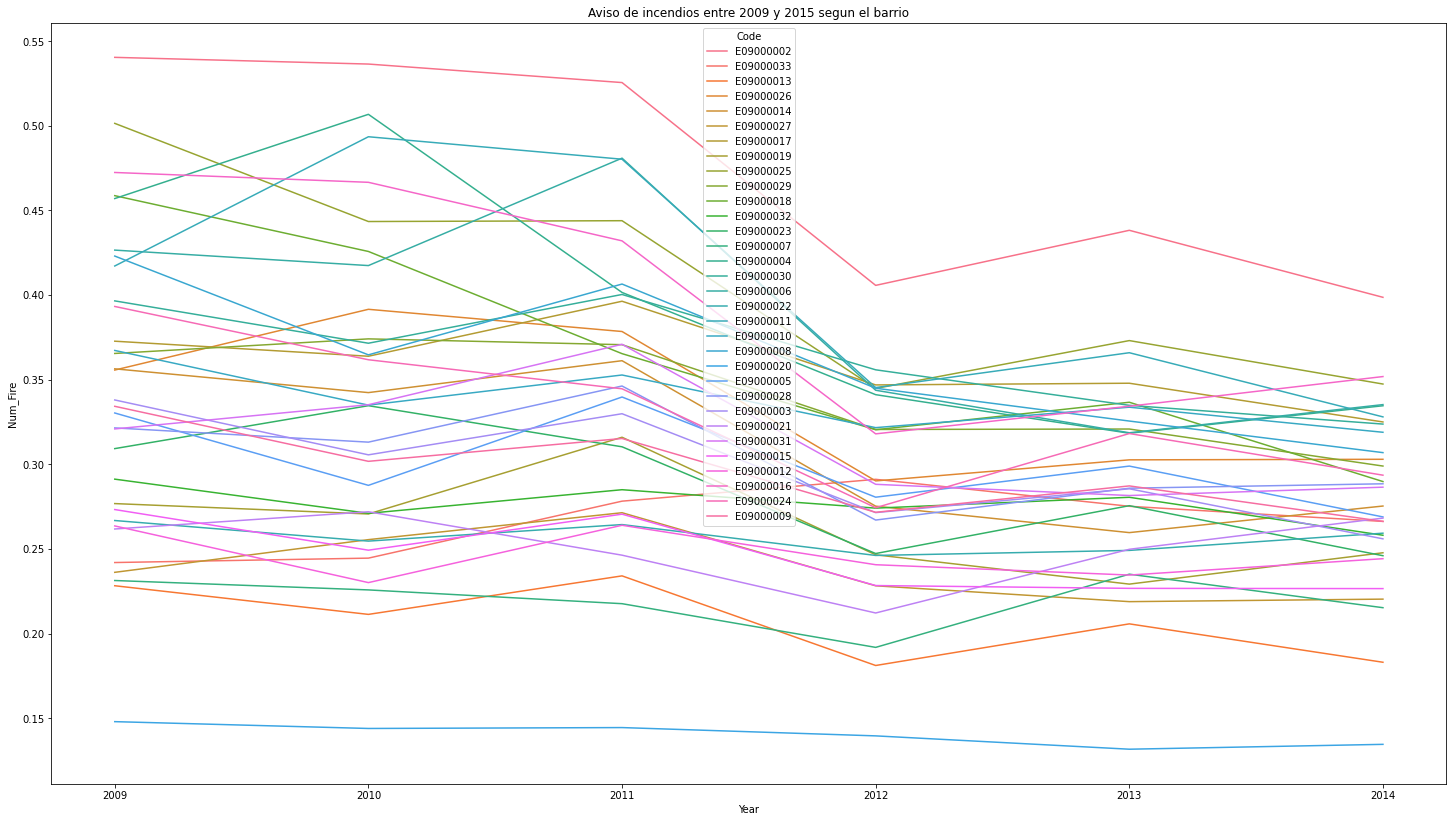

In [ ]:
llamadas_dims = (25, 14)
fig, ax = pyplot.subplots(figsize=llamadas_dims)
plt.title("Aviso de incendios entre 2009 y 2015 segun el barrio")
sns.lineplot(data=llamadas, x="Year", y="Num_Fire", hue="Code",ax=ax,ci=None)


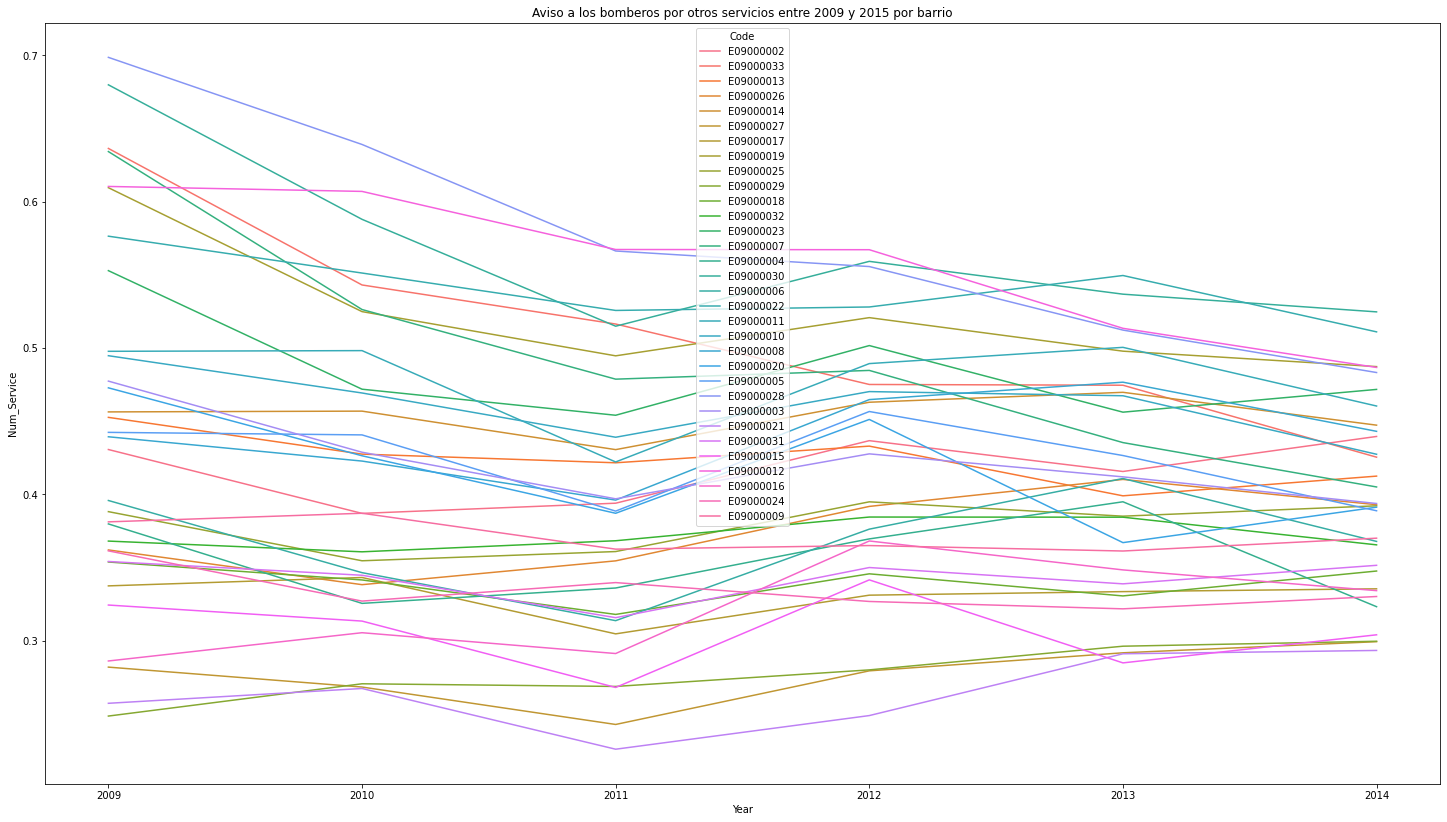

In [ ]:

fig, ax = pyplot.subplots(figsize=llamadas_dims)
plt.title("Aviso a los bomberos por otros servicios entre 2009 y 2015 por barrio")
sns.lineplot(data=llamadas, x="Year", y="Num_Service", hue="Code",ax=ax,ci=None)

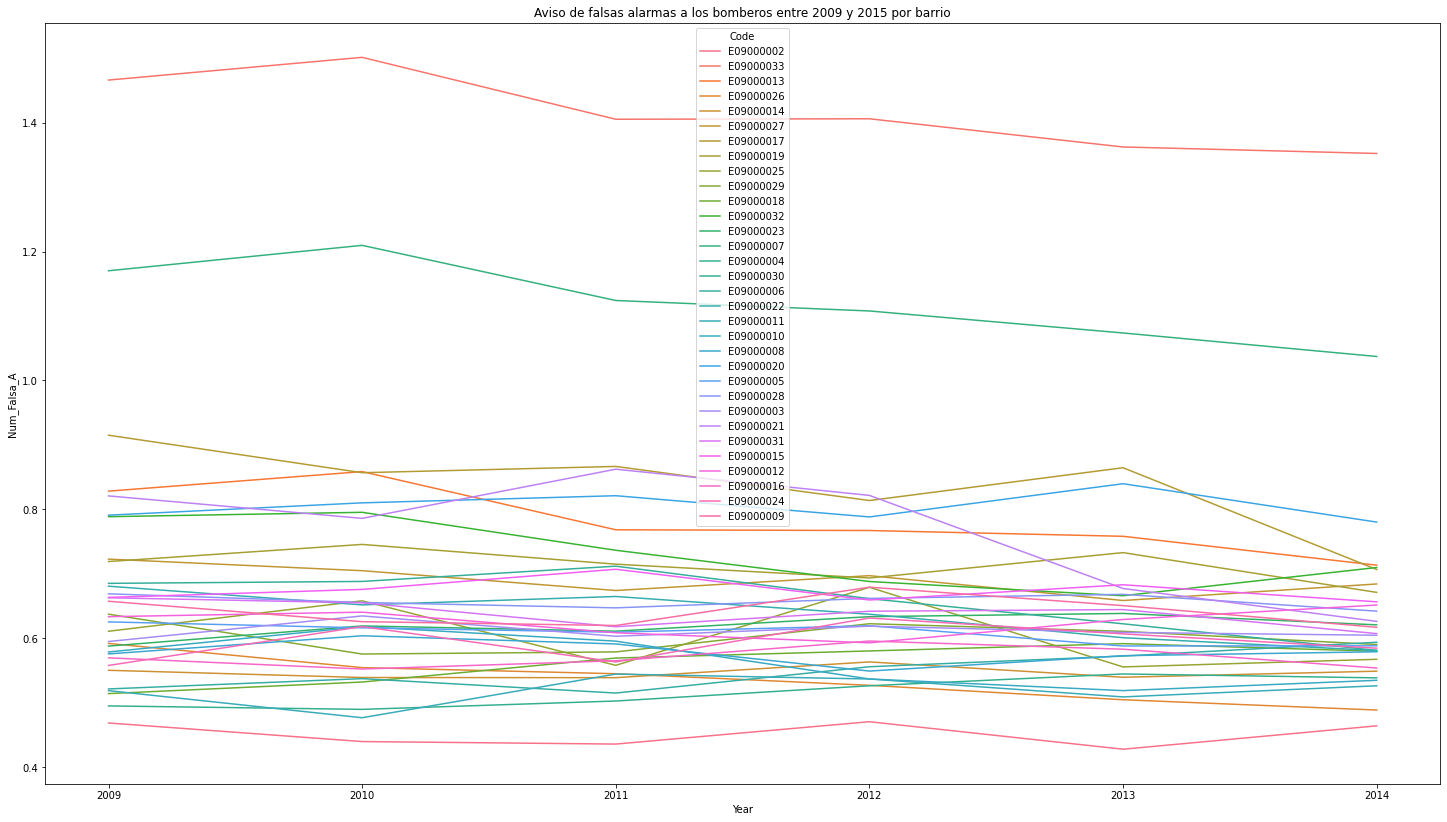

In [ ]:
fig, ax = pyplot.subplots(figsize=llamadas_dims)
plt.title("Aviso de falsas alarmas a los bomberos entre 2009 y 2015 por barrio")
sns.lineplot(data=llamadas, x="Year", y="Num_Falsa_A", hue="Code",ax=ax,ci=None)

## DATASET PRECIO VIVIENDA POR GANACIAS


In [ ]:
viviendas = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/ratio-house-price-earnings-residence-based.xlsx')
viviendas_test=pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/ratio-house-price-earnings-residence-based.xlsx')
viviendas.head()



New Code Old Code                  Area  2002  ...   2017   2018   2019   2020
0        NaN      NaN                   NaN   NaN  ...    NaN    NaN    NaN    NaN
1  E09000001     00AA        City of London  6.29  ...      :  16.55      :      :
2  E09000002     00AB  Barking and Dagenham  4.68  ...     10  10.40  10.75   9.63
3  E09000003     00AC                Barnet  7.42  ...   13.7  14.45  14.19  15.93
4  E09000004     00AD                Bexley  5.56  ...  10.01  10.04   9.61   9.28

[5 rows x 22 columns]

###ANALISIS DE DATOS

In [ ]:
#descripcionDatosDataset(viviendas)

###LIMPIEZA

In [ ]:
viviendas["Code_true"]= viviendas["New Code"].str.contains('E09', na=False)
viviendas=viviendas.loc[(viviendas["Code_true"]==True)]
viviendas.drop("Code_true", inplace=True, axis=1)

viviendas_test["Code_true"]= viviendas_test["New Code"].str.contains('E09', na=False)
viviendas_test=viviendas_test.loc[(viviendas_test["Code_true"]==True)]
viviendas_test.drop("Code_true", inplace=True, axis=1)



viviendas

New Code Old Code                    Area  ...   2018   2019   2020
1   E09000001     00AA          City of London  ...  16.55      :      :
2   E09000002     00AB    Barking and Dagenham  ...  10.40  10.75   9.63
3   E09000003     00AC                  Barnet  ...  14.45  14.19  15.93
4   E09000004     00AD                  Bexley  ...  10.04   9.61   9.28
5   E09000005     00AE                   Brent  ...  16.32  15.59  14.49
6   E09000006     00AF                 Bromley  ...  11.00  10.73  10.55
7   E09000007     00AG                  Camden  ...  18.23  18.27  18.81
8   E09000008     00AH                 Croydon  ...  10.46  10.97  10.41
9   E09000009     00AJ                  Ealing  ...  14.16  14.79   13.2
10  E09000010     00AK                 Enfield  ...  12.94  12.34  12.51
11  E09000011     00AL               Greenwich  ...  11.95  12.72     12
12  E09000012     00AM                 Hackney  ...  16.34  16.04  16.66
13  E09000013     00AN  Hammersmith and Fulham  ...  20.04  17.34  18.54
14  E09000014     00AP                Haringey  ...  15.66   14.4  14.58
15  E09000015     00AQ                  Harrow  ...  13.59  13.02  12.48
16  E09000016     00AR                Havering  ...  10.54  10.77  10.65
17  E09000017     00AS              Hillingdon  ...  13.56  13.15  12.28
18  E09000018     00AT                Hounslow  ...  12.75  11.82  12.31
19  E09000019     00AU               Islington  ...  13.10  13.73  13.79
20  E09000020     00AW  Kensington and Chelsea  ...  33.43  27.64  27.16
21  E09000021     00AX    Kingston upon Thames  ...  12.74  12.71  11.92
22  E09000022     00AY                 Lambeth  ...  13.82   14.4   13.1
23  E09000023     00AZ                Lewisham  ...  12.20  12.74  11.55
24  E09000024     00BA                  Merton  ...  12.91   12.4  11.53
25  E09000025     00BB                  Newham  ...  13.28  12.98  12.14
26  E09000026     00BC               Redbridge  ...  12.79  12.02  11.63
27  E09000027     00BD    Richmond upon Thames  ...  14.88  14.74   13.5
28  E09000028     00BE               Southwark  ...  15.35  14.31  13.83
29  E09000029     00BF                  Sutton  ...  10.77   10.4  11.56
30  E09000030     00BG           Tower Hamlets  ...  12.73   11.5  12.12
31  E09000031     00BH          Waltham Forest  ...  13.55  12.66  12.37
32  E09000032     00BJ              Wandsworth  ...  14.80  14.38  14.39
33  E09000033     00BK             Westminster  ...  23.66   21.6  22.41

[33 rows x 22 columns]

###TRANSFORMACION

Realizamos las transformaciones necesarias para poder unirlo

In [ ]:
#Transformacion de dataset para poder unirlo al principal
viv=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda', "Year"])
viviendas_tr=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda',"Year"])
for i in range(1,33):
  viv["Ingreso_Vivienda"]=viviendas.iloc[i,3:22]
  viv["Code"]=viviendas.iloc[i,0]
  viv["Year"]=viviendas.columns[3:22]
  viviendas_tr=pd.concat([viviendas_tr,viv])
viviendas_tr

Code Ingreso_Vivienda  Year
2002  E09000002             4.68  2002
2003  E09000002             6.26  2003
2004  E09000002             7.18  2004
2005  E09000002             7.15  2005
2006  E09000002             6.55  2006
...         ...              ...   ...
2016  E09000033            23.48  2016
2017  E09000033            24.36  2017
2018  E09000033            23.66  2018
2019  E09000033             21.6  2019
2020  E09000033            22.41  2020

[608 rows x 3 columns]

In [ ]:
#Transformacion de dataset para poder unirlo al principal
viv_test=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda', "Year"])
viviendas_test_tr=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda',"Year"])
for i in range(1,33):
  viv_test["Ingreso_Vivienda"]=viviendas_test.iloc[i,3:22]
  viv_test["Code"]=viviendas_test.iloc[i,0]
  viv_test["Year"]=viviendas_test.columns[3:22]
  viviendas__test_tr=pd.concat([viviendas_test_tr,viv_test])
viviendas_test_tr

Empty DataFrame
Columns: [Code, Ingreso_Vivienda, Year]
Index: []

In [ ]:
viviendas_tr["Code"]=viviendas_tr["Code"].astype("string")
viviendas_tr["Year"]=viviendas_tr["Year"].astype(int)
viviendas_tr["Ingreso_Vivienda"]=viviendas_tr["Ingreso_Vivienda"].astype(int)

viviendas__test_tr["Code"]=viviendas__test_tr["Code"].astype("string")
viviendas__test_tr["Year"]=viviendas__test_tr["Year"].astype(int)
viviendas__test_tr["Ingreso_Vivienda"]=viviendas__test_tr["Ingreso_Vivienda"].astype(int)



In [ ]:
viviendas_tr= viviendas_tr.loc[(viviendas_tr["Year"]>=2009)&(viviendas_tr["Year"]<=2014)]

viviendas__test_tr= viviendas__test_tr.loc[(viviendas__test_tr["Year"]>=2015)&(viviendas__test_tr["Year"]<=2015)]

###VISUALIZACION

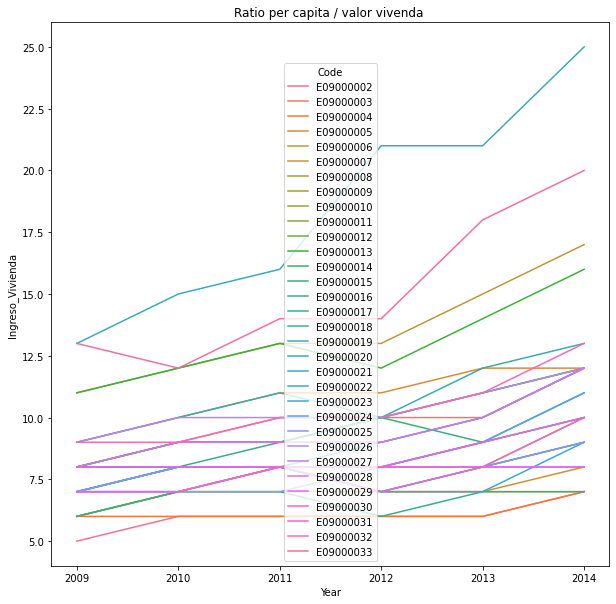

In [ ]:
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
plt.title("Ratio per capita / valor vivenda ")
sns.lineplot(data=viviendas_tr, x="Year", y="Ingreso_Vivienda", hue="Code",ax=ax)


##DATASET DENSIDAD POBLACION

In [ ]:
densidad = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/housing-density-borough.csv')
densidad_test=pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/housing-density-borough.csv')
densidad

Code  ... Population_per_square_kilometre
0     E09000001  ...                          2266.2
1     E09000001  ...                          2415.3
2     E09000001  ...                          2534.1
3     E09000001  ...                          2506.9
4     E09000001  ...                          2450.1
...         ...  ...                             ...
1867  E13000002  ...                          5240.8
1868  E13000002  ...                          5261.2
1869  E13000002  ...                          5280.4
1870  E13000002  ...                          5300.1
1871  E13000002  ...                          5319.0

[1872 rows x 10 columns]

###ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(densidad)

Cantidad de filas: 1872
Cantidad de columnas: 10
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000001' 'E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006'
 'E09000007' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Name
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: numérico
Descripción de valores:
min       1999.000000
max       2050.000000
mean      2024.500000
std         15.012341


###LIMPIEZA

In [ ]:
col_eliminar_densidad=["Name","Source","Inland_Area _Hectares", "Total_Area_Hectares", "Population_per_hectare", "Population_per_square_kilometre"]
densidad.drop(col_eliminar_densidad, inplace=True, axis=1)

densidad_test.drop(col_eliminar_densidad, inplace=True, axis=1)

densidad

Code  Year  Population  Square_Kilometres
0     E09000001  1999        6581                2.9
1     E09000001  2000        7014                2.9
2     E09000001  2001        7359                2.9
3     E09000001  2002        7280                2.9
4     E09000001  2003        7115                2.9
...         ...   ...         ...                ...
1867  E13000002  2046     6573194             1254.2
1868  E13000002  2047     6598789             1254.2
1869  E13000002  2048     6622921             1254.2
1870  E13000002  2049     6647527             1254.2
1871  E13000002  2050     6671295             1254.2

[1872 rows x 4 columns]

In [ ]:
densidad["Code"]=densidad["Code"].astype("string")
densidad["Year"]=densidad["Year"].astype(int)
densidad["Population"]=densidad["Population"].astype(int)
densidad["Square_Kilometres"]=densidad["Square_Kilometres"].astype(int)
densidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Code               1872 non-null   string
 1   Year               1872 non-null   int64 
 2   Population         1872 non-null   int64 
 3   Square_Kilometres  1872 non-null   int64 
dtypes: int64(3), string(1)
memory usage: 58.6 KB


In [ ]:
densidad_test["Code"]=densidad_test["Code"].astype("string")
densidad_test["Year"]=densidad_test["Year"].astype(int)
densidad_test["Population"]=densidad_test["Population"].astype(int)
densidad_test["Square_Kilometres"]=densidad_test["Square_Kilometres"].astype(int)
densidad_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Code               1872 non-null   string
 1   Year               1872 non-null   int64 
 2   Population         1872 non-null   int64 
 3   Square_Kilometres  1872 non-null   int64 
dtypes: int64(3), string(1)
memory usage: 58.6 KB


In [ ]:
#Renombramos las columnas para poder hacer las uniones entre los distintos datasets
densidad=densidad.rename(columns={"Population":"Poblacion", "Square_Kilometres":"Area_m2"})

densidad_test=densidad_test.rename(columns={"Population":"Poblacion", "Square_Kilometres":"Area_m2"})

densidad

Code  Year  Poblacion  Area_m2
0     E09000001  1999       6581        2
1     E09000001  2000       7014        2
2     E09000001  2001       7359        2
3     E09000001  2002       7280        2
4     E09000001  2003       7115        2
...         ...   ...        ...      ...
1867  E13000002  2046    6573194     1254
1868  E13000002  2047    6598789     1254
1869  E13000002  2048    6622921     1254
1870  E13000002  2049    6647527     1254
1871  E13000002  2050    6671295     1254

[1872 rows x 4 columns]

In [ ]:
#Atributo code
densidad["Code"].unique()   

<StringArray>
['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
 'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033', 'E12000007', 'E13000001', 'E13000002']
Length: 36, dtype: string

In [ ]:
densidad["Code_true"]= densidad["Code"].str.contains('E09', na=False)
densidad=densidad.loc[(densidad["Code_true"]==True)]
densidad.drop("Code_true", inplace=True, axis=1)

densidad_test["Code_true"]= densidad_test["Code"].str.contains('E09', na=False)
densidad_test=densidad_test.loc[(densidad_test["Code_true"]==True)]
densidad_test.drop("Code_true", inplace=True, axis=1)

densidad["Code"].unique() 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<StringArray>
['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
 'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033']
Length: 33, dtype: string

In [ ]:
densidad=densidad.loc[(densidad["Code"]!="E09000001")]

densidad_test=densidad_test.loc[(densidad_test["Code"]!="E09000001")]

In [ ]:
densidad["Year"].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042,
       2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050])

In [ ]:
densidad=densidad.loc[(densidad["Year"]<=2014)&(densidad["Year"]>=2009)]

densidad_test=densidad_test.loc[(densidad_test["Year"]<=2015)&(densidad_test["Year"]>=2015)]


###VISUALIZACION

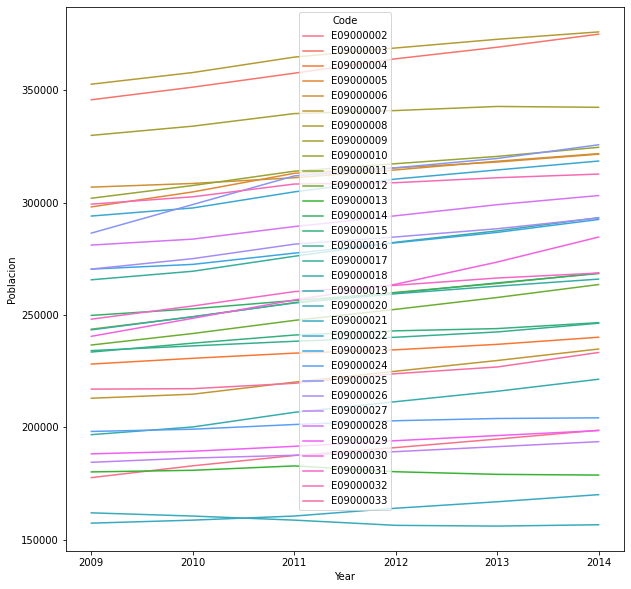

In [ ]:
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=densidad, x="Year", y="Poblacion", hue="Code",ax=ax)

##DATASET CRIMENES

In [ ]:
crimenes = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/crime-rates.csv')
crimenes_test=pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/crime-rates.csv')
crimenes_test
crimenes

Code               Borough  ...   Rate Number_of_offences
0     E09000002  Barking and Dagenham  ...  120.5             19,567
1     E09000003                Barnet  ...   98.0             30,708
2     E09000004                Bexley  ...   95.1             20,680
3     E09000005                 Brent  ...  127.7             33,253
4     E09000006               Bromley  ...   89.8             26,474
...         ...                   ...  ...    ...                ...
6655        NaN              Heathrow  ...    NaN              1,081
6656  E13000001          Inner London  ...    1.7              6,041
6657  E13000002          Outer London  ...    1.3              6,637
6658  E12000007       Met Police Area  ...    1.6             13,759
6659        727     England and Wales  ...    NaN                NaN

[6660 rows x 6 columns]

In [ ]:
crimenes["Offences"].unique()

array(['All recorded offences', 'Violence Against the Person',
       'Sexual Offences', 'Robbery', 'Burglary', 'Theft and Handling',
       'Fraud or Forgery', 'Criminal Damage', 'Drugs',
       'Other Notifiable Offences'], dtype=object)

###ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(crimenes)

Cantidad de filas: 6660
Cantidad de columnas: 6
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006' 'E09000007'
 'E09000008' 'E09000009' 'E09000010' 'E09000011']
-- Cantidad de nulos: 180 = 2.70%
----------------------------------------------------------------------------------------------------
Columna: Borough
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['1999-00' '2000-01' '2001-02' '2002-03' '2003-04' '20

###LIMPIEZA

In [ ]:
crimenes["Number_of_offences"]=crimenes["Number_of_offences"].str.replace(",","")

crimenes_test["Number_of_offences"]=crimenes_test["Number_of_offences"].str.replace(",","")

In [ ]:
col_eliminar_crimenes=["Borough", "Rate"]
crimenes.drop(col_eliminar_crimenes, inplace=True, axis=1)

crimenes_test.drop(col_eliminar_crimenes, inplace=True, axis=1)

crimenes

Code     Year                   Offences Number_of_offences
0     E09000002  1999-00      All recorded offences              19567
1     E09000003  1999-00      All recorded offences              30708
2     E09000004  1999-00      All recorded offences              20680
3     E09000005  1999-00      All recorded offences              33253
4     E09000006  1999-00      All recorded offences              26474
...         ...      ...                        ...                ...
6655        NaN  2016-17  Other Notifiable Offences               1081
6656  E13000001  2016-17  Other Notifiable Offences               6041
6657  E13000002  2016-17  Other Notifiable Offences               6637
6658  E12000007  2016-17  Other Notifiable Offences              13759
6659        727  2016-17  Other Notifiable Offences                NaN

[6660 rows x 4 columns]

In [ ]:
#Creamos un dataset por cada tipo de crimen
#Violencia
crimenes_violence=crimenes.loc[crimenes["Offences"]=="Violence Against the Person"]
crimenes_violence=crimenes_violence.rename(columns={"Number_of_offences": "Crim_Violencia"})
crimenes_violence.drop("Offences", inplace=True, axis=1)

#Sexual
crimenes_sexual=crimenes.loc[crimenes["Offences"]=="Sexual Offences"]
crimenes_sexual=crimenes_sexual.rename(columns={"Number_of_offences": "Crim_Sexual"})
crimenes_sexual.drop("Offences", inplace=True, axis=1)

#Robos
crimenes_robbery=crimenes.loc[crimenes["Offences"]=="Robbery"]
crimenes_robbery=crimenes_robbery.rename(columns={"Number_of_offences": "Crim_Robos"})
crimenes_robbery.drop("Offences", inplace=True, axis=1)

#Robos en casas
crimenes_burglary=crimenes.loc[crimenes["Offences"]=="Burglary"]
crimenes_burglary=crimenes_burglary.rename(columns={"Number_of_offences": "Crim_Robos_casas"})
crimenes_burglary.drop("Offences", inplace=True, axis=1)

#ladrones
crimenes_theft=crimenes.loc[crimenes["Offences"]=="Theft and Handling"]
crimenes_theft=crimenes_theft.rename(columns={"Number_of_offences": "Crim_ladrones"})
crimenes_theft.drop("Offences", inplace=True, axis=1)

#Fraudes
crimenes_fraud=crimenes.loc[crimenes["Offences"]=="Fraud or Forgery"]
crimenes_fraud=crimenes_fraud.rename(columns={"Number_of_offences": "Crim_Fraude"})
crimenes_fraud.drop("Offences", inplace=True, axis=1)

#Danyos
crimenes_damage=crimenes.loc[crimenes["Offences"]=="Criminal Damage"]
crimenes_damage=crimenes_damage.rename(columns={"Number_of_offences": "Crim_Danyo"})
crimenes_damage.drop("Offences", inplace=True, axis=1)

#Drogas
crimenes_drugs=crimenes.loc[crimenes["Offences"]=="Drugs"]
crimenes_drugs=crimenes_drugs.rename(columns={"Number_of_offences": "Crim_Drogas"})
crimenes_drugs.drop("Offences", inplace=True, axis=1)

#Otros
crimenes_other=crimenes.loc[crimenes["Offences"]=="Other Notifiable Offences"]
crimenes_other=crimenes_other.rename(columns={"Number_of_offences": "Crim_Otros"})
crimenes_other.drop("Offences", inplace=True, axis=1)


In [ ]:
#Creamos un dataset por cada tipo de crimen
#Violencia
crimenes_violence_test=crimenes_test.loc[crimenes_test["Offences"]=="Violence Against the Person"]
crimenes_violence_test=crimenes_violence_test.rename(columns={"Number_of_offences": "Crim_Violencia"})
crimenes_violence_test.drop("Offences", inplace=True, axis=1)

#Sexual
crimenes_sexual_test=crimenes_test.loc[crimenes_test["Offences"]=="Sexual Offences"]
crimenes_sexual_test=crimenes_sexual_test.rename(columns={"Number_of_offences": "Crim_Sexual"})
crimenes_sexual_test.drop("Offences", inplace=True, axis=1)

#Robos
crimenes_robbery_test=crimenes_test.loc[crimenes_test["Offences"]=="Robbery"]
crimenes_robbery_test=crimenes_robbery_test.rename(columns={"Number_of_offences": "Crim_Robos"})
crimenes_robbery_test.drop("Offences", inplace=True, axis=1)

#Robos en casas
crimenes_burglary_test=crimenes_test.loc[crimenes_test["Offences"]=="Burglary"]
crimenes_burglary_test=crimenes_burglary_test.rename(columns={"Number_of_offences": "Crim_Robos_casas"})
crimenes_burglary_test.drop("Offences", inplace=True, axis=1)

#ladrones
crimenes_theft_test=crimenes_test.loc[crimenes_test["Offences"]=="Theft and Handling"]
crimenes_theft_test=crimenes_theft_test.rename(columns={"Number_of_offences": "Crim_ladrones"})
crimenes_theft_test.drop("Offences", inplace=True, axis=1)

#Fraudes
crimenes_fraud_test=crimenes_test.loc[crimenes_test["Offences"]=="Fraud or Forgery"]
crimenes_fraud_test=crimenes_fraud_test.rename(columns={"Number_of_offences": "Crim_Fraude"})
crimenes_fraud_test.drop("Offences", inplace=True, axis=1)

#Danyos
crimenes_damage_test=crimenes_test.loc[crimenes_test["Offences"]=="Criminal Damage"]
crimenes_damage_test=crimenes_damage_test.rename(columns={"Number_of_offences": "Crim_Danyo"})
crimenes_damage_test.drop("Offences", inplace=True, axis=1)

#Drogas
crimenes_drugs_test=crimenes_test.loc[crimenes["Offences"]=="Drugs"]
crimenes_drugs_test=crimenes_drugs_test.rename(columns={"Number_of_offences": "Crim_Drogas"})
crimenes_drugs_test.drop("Offences", inplace=True, axis=1)

#Otros
crimenes_other_test=crimenes_test.loc[crimenes_test["Offences"]=="Other Notifiable Offences"]
crimenes_other_test=crimenes_other_test.rename(columns={"Number_of_offences": "Crim_Otros"})
crimenes_other_test.drop("Offences", inplace=True, axis=1)

###UNION DATASET CRIMENES

In [ ]:
dfs = [crimenes_violence,crimenes_sexual,crimenes_robbery, crimenes_burglary,crimenes_theft,crimenes_fraud,crimenes_damage,crimenes_drugs,crimenes_other]
crimenes_total = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)


dfs_test = [crimenes_violence_test,crimenes_sexual_test,crimenes_robbery_test, crimenes_burglary_test,crimenes_theft_test,crimenes_fraud_test,crimenes_damage_test,crimenes_drugs_test,crimenes_other_test]
crimenes_total_test = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs_test)

crimenes_total

Code     Year Crim_Violencia  ... Crim_Danyo Crim_Drogas Crim_Otros
0    E09000002  1999-00           3210  ...       3666         444        167
1    E09000003  1999-00           4244  ...       5110         494        273
2    E09000004  1999-00           3151  ...       4390         375        184
3    E09000005  1999-00           5407  ...       4272         969        354
4    E09000006  1999-00           3224  ...       5283         525        214
..         ...      ...            ...  ...        ...         ...        ...
661        NaN  2016-17            269  ...         57          66       1081
662  E13000001  2016-17          93353  ...      23094       17221       6041
663  E13000002  2016-17         104389  ...      31112       13881       6637
664  E12000007  2016-17         198011  ...      54263       31168      13759
665        727  2016-17            NaN  ...        NaN         NaN        NaN

[666 rows x 11 columns]

In [ ]:
crimenes_total=crimenes_total.loc[(crimenes_total["Code"]!="E09000001")]

crimenes_total_test=crimenes_total_test.loc[(crimenes_total_test["Code"]!="E09000001")]

crimenes_total["Code"].unique()

array(['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
       'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011',
       'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016',
       'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021',
       'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026',
       'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
       'E09000032', 'E09000033', nan, 'E13000001', 'E13000002',
       'E12000007', '727'], dtype=object)

In [ ]:
crimenes_total["Code_true"]= crimenes_total["Code"].str.contains('E09', na=False)
crimenes_total=crimenes_total.loc[(crimenes_total["Code_true"]==True)]
crimenes_total.drop("Code_true", inplace=True, axis=1)

crimenes_total_test["Code_true"]= crimenes_total_test["Code"].str.contains('E09', na=False)
crimenes_total_test=crimenes_total_test.loc[(crimenes_total_test["Code_true"]==True)]
crimenes_total_test.drop("Code_true", inplace=True, axis=1)
crimenes_total_test["Code"].unique() 


crimenes_total["Code"].unique() 

array(['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
       'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011',
       'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016',
       'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021',
       'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026',
       'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
       'E09000032', 'E09000033'], dtype=object)

In [ ]:
#Cambio el formato de la fercha de los crimenes solo no interesa el anyo
crimenes_total["Year"]=crimenes_total["Year"].map(lambda x: str(x)[:-3])

crimenes_total_test["Year"]=crimenes_total_test["Year"].map(lambda x: str(x)[:-3])

crimenes_total["Year"]

0      1999
1      1999
2      1999
3      1999
4      1999
       ... 
656    2016
657    2016
658    2016
659    2016
660    2016
Name: Year, Length: 576, dtype: object

In [ ]:
crimenes_total["Year"]=crimenes_total["Year"].astype(int)
crimenes_total=crimenes_total.loc[(crimenes_total["Year"]<=2014) & (crimenes_total["Year"]>=2009)]

crimenes_total_test["Year"]=crimenes_total_test["Year"].astype(int)
crimenes_total_test=crimenes_total_test.loc[(crimenes_total_test["Year"]<=2015) & (crimenes_total_test["Year"]>=2015)]


In [ ]:
crimenes_total["Code"]=crimenes_total["Code"].astype("string")
crimenes_total["Crim_Violencia"]=crimenes_total["Crim_Violencia"].astype(int)
crimenes_total["Crim_Sexual"]=crimenes_total["Crim_Sexual"].astype(int)
crimenes_total["Crim_Robos"]=crimenes_total["Crim_Robos"].astype(int)
crimenes_total["Crim_ladrones"]=crimenes_total["Crim_ladrones"].astype(int)
crimenes_total["Crim_Robos_casas"]=crimenes_total["Crim_Robos_casas"].astype(int)
crimenes_total["Crim_Fraude"]=crimenes_total["Crim_Fraude"].astype(int)
crimenes_total["Crim_Danyo"]=crimenes_total["Crim_Danyo"].astype(int)
crimenes_total["Crim_Drogas"]=crimenes_total["Crim_Drogas"].astype(int)
crimenes_total["Crim_Otros"]=crimenes_total["Crim_Otros"].astype(int)

crimenes_total_test["Code"]=crimenes_total_test["Code"].astype("string")
crimenes_total_test["Crim_Violencia"]=crimenes_total_test["Crim_Violencia"].astype(int)
crimenes_total_test["Crim_Sexual"]=crimenes_total_test["Crim_Sexual"].astype(int)
crimenes_total_test["Crim_Robos"]=crimenes_total_test["Crim_Robos"].astype(int)
crimenes_total_test["Crim_ladrones"]=crimenes_total_test["Crim_ladrones"].astype(int)
crimenes_total_test["Crim_Robos_casas"]=crimenes_total_test["Crim_Robos_casas"].astype(int)
crimenes_total_test["Crim_Fraude"]=crimenes_total_test["Crim_Fraude"].astype(int)
crimenes_total_test["Crim_Danyo"]=crimenes_total_test["Crim_Danyo"].astype(int)
crimenes_total_test["Crim_Drogas"]=crimenes_total_test["Crim_Drogas"].astype(int)
crimenes_total_test["Crim_Otros"]=crimenes_total_test["Crim_Otros"].astype(int)


crimenes_total.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 370 to 586
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Code              192 non-null    string
 1   Year              192 non-null    int64 
 2   Crim_Violencia    192 non-null    int64 
 3   Crim_Sexual       192 non-null    int64 
 4   Crim_Robos        192 non-null    int64 
 5   Crim_Robos_casas  192 non-null    int64 
 6   Crim_ladrones     192 non-null    int64 
 7   Crim_Fraude       192 non-null    int64 
 8   Crim_Danyo        192 non-null    int64 
 9   Crim_Drogas       192 non-null    int64 
 10  Crim_Otros        192 non-null    int64 
dtypes: int64(10), string(1)
memory usage: 18.0 KB


In [ ]:
crimenes_total["Code_true"]= crimenes_total["Code"].str.contains('E09', na=False)
crimenes_total=crimenes_total.loc[(crimenes_total["Code_true"]==True)]
crimenes_total.drop("Code_true", inplace=True, axis=1)

crimenes_total_test["Code_true"]= crimenes_total_test["Code"].str.contains('E09', na=False)
crimenes_total_test=crimenes_total_test.loc[(crimenes_total_test["Code_true"]==True)]
crimenes_total_test.drop("Code_true", inplace=True, axis=1)
crimenes_total_test["Code"].unique()   

crimenes_total["Code"].unique()   

<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013',
 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
 'E09000032', 'E09000033']
Length: 32, dtype: string

###VISUALIZACION

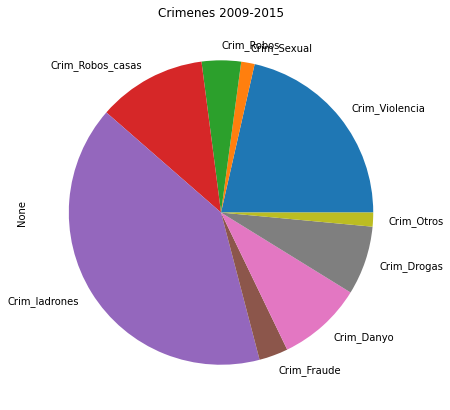

In [ ]:
a4_dims = (7, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
crimenes_total[crimenes_total.columns[2:]].sum().plot.pie(ax=ax, title="Crimenes 2009-2015")

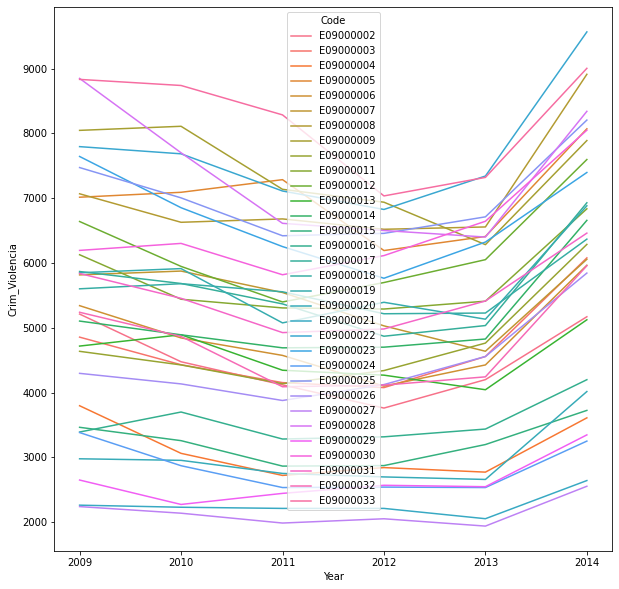

In [ ]:
a4_dims = (10, 10)
crimenes_total["Crim_Violencia"]=crimenes_total["Crim_Violencia"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Violencia", hue="Code",ax=ax)

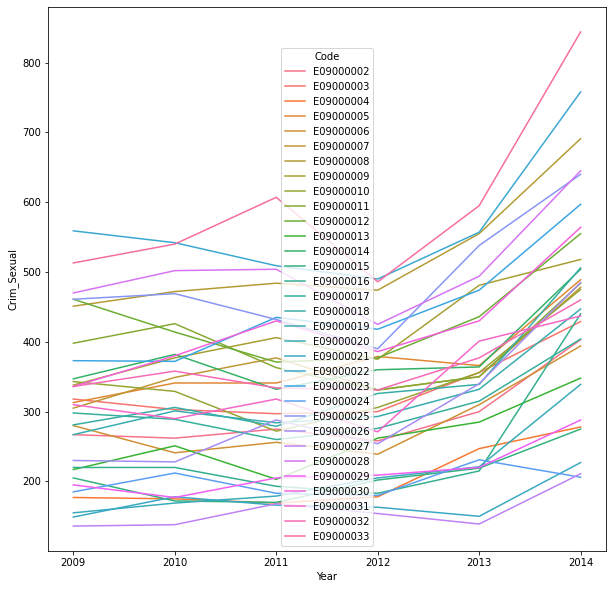

In [ ]:
crimenes_total["Crim_Sexual"]=crimenes_total["Crim_Sexual"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Sexual", hue="Code",ax=ax)

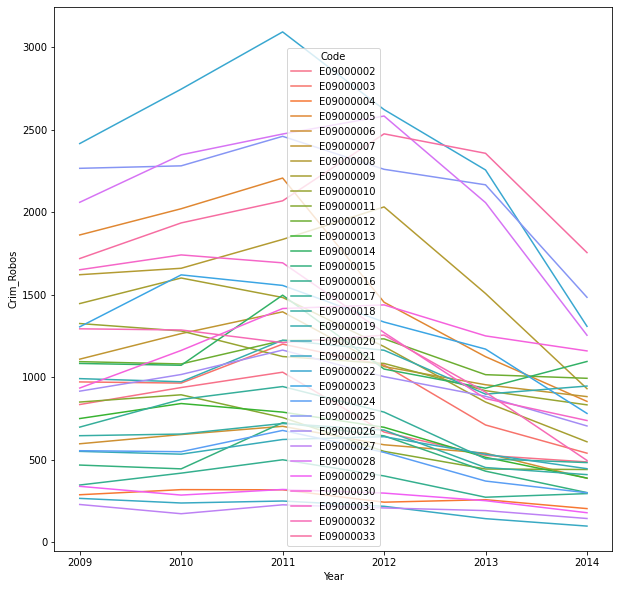

In [ ]:
crimenes_total["Crim_Robos"]=crimenes_total["Crim_Robos"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Robos", hue="Code",ax=ax)

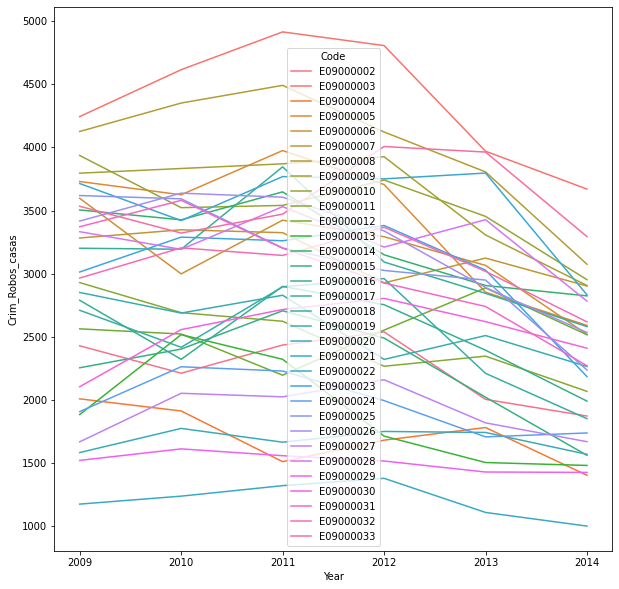

In [ ]:
crimenes_total["Crim_Robos_casas"]=crimenes_total["Crim_Robos_casas"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Robos_casas", hue="Code",ax=ax)

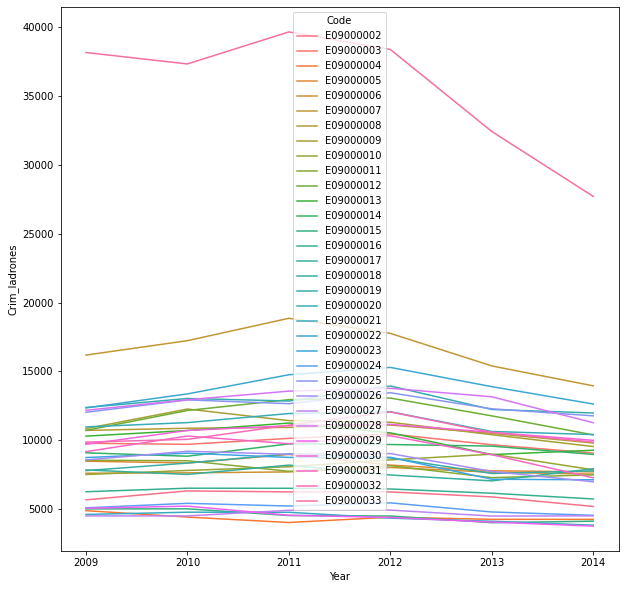

In [ ]:
crimenes_total["Crim_ladrones"]=crimenes_total["Crim_ladrones"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_ladrones", hue="Code",ax=ax)

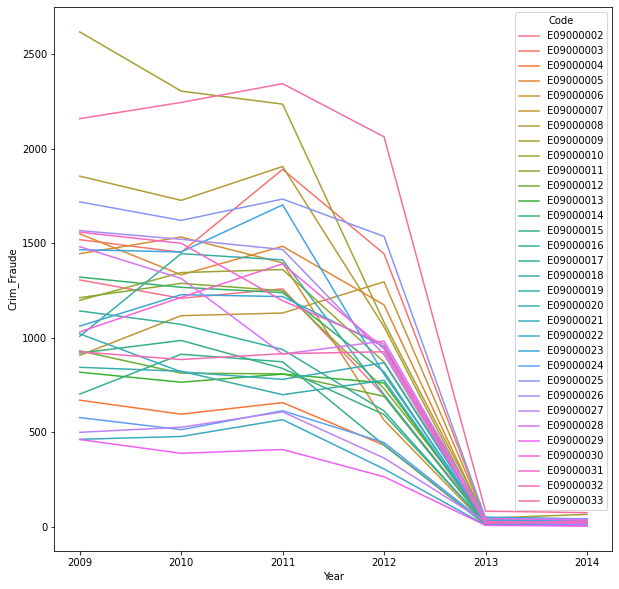

In [ ]:
crimenes_total["Crim_Fraude"]=crimenes_total["Crim_Fraude"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Fraude", hue="Code",ax=ax)

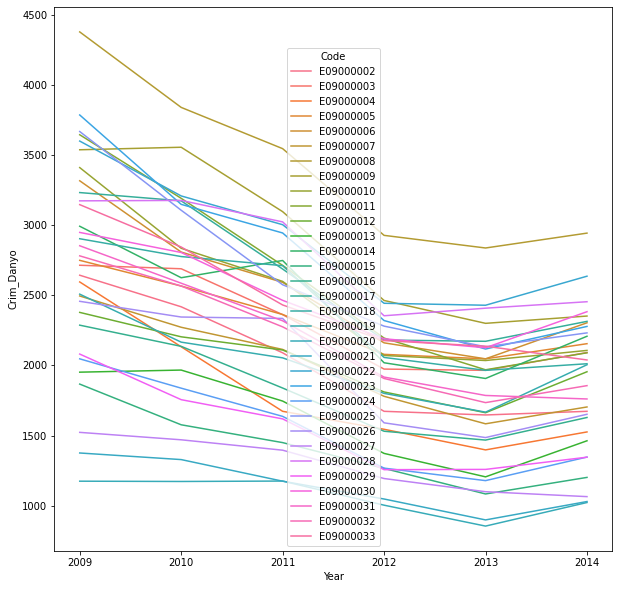

In [ ]:
crimenes_total["Crim_Danyo"]=crimenes_total["Crim_Danyo"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Danyo", hue="Code",ax=ax)

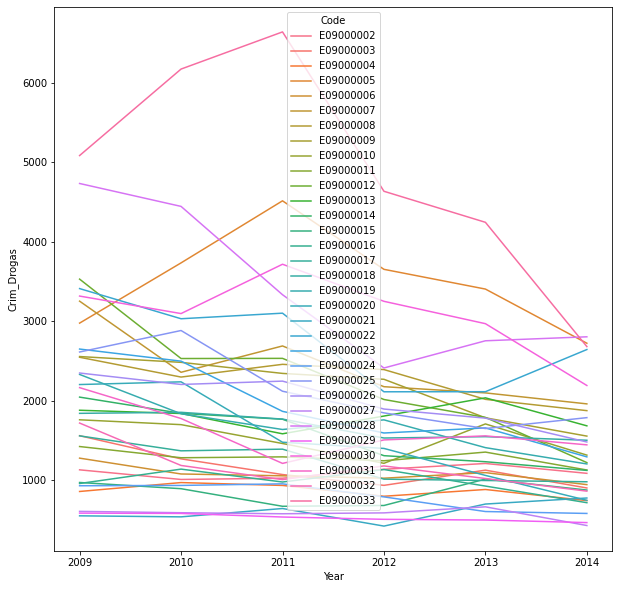

In [ ]:
crimenes_total["Crim_Drogas"]=crimenes_total["Crim_Drogas"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Drogas", hue="Code",ax=ax)

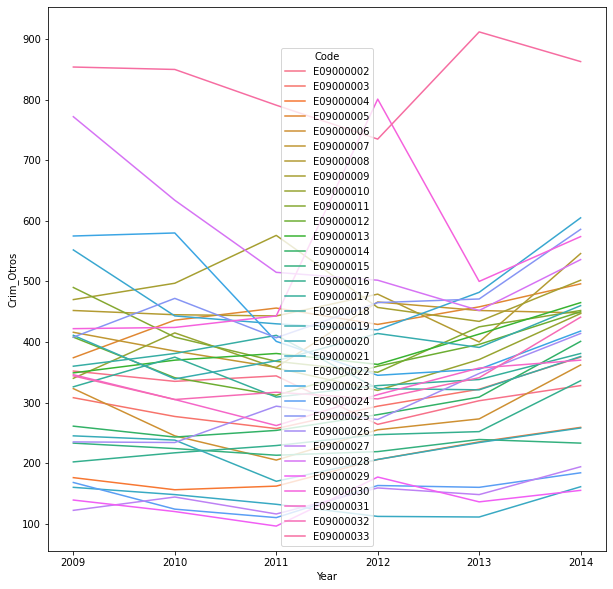

In [ ]:
crimenes_total["Crim_Otros"]=crimenes_total["Crim_Otros"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Otros", hue="Code",ax=ax)

##DATASET PRECIO VIVIENDA

In [ ]:
p_vivienda = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/land-registry-house-prices-borough.csv')
p_vivienda_test=pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/land-registry-house-prices-borough.csv')
p_vivienda

Code                  Area                  Year Measure    Value
0      E09000001        City of London  Year ending Dec 1995  Median  105,000
1      E09000002  Barking and Dagenham  Year ending Dec 1995  Median   49,000
2      E09000003                Barnet  Year ending Dec 1995  Median   85,125
3      E09000004                Bexley  Year ending Dec 1995  Median   62,000
4      E09000005                 Brent  Year ending Dec 1995  Median   68,000
...          ...                   ...                   ...     ...      ...
12010  E12000008            South East  Year ending Dec 2017   Sales  148,025
12011  E12000009            South West  Year ending Dec 2017   Sales  102,292
12012  E92000001               England  Year ending Dec 2017   Sales  837,501
12013  W92000076                 Wales  Year ending Dec 2017   Sales   46,828
12014  K04000073     England And Wales  Year ending Dec 2017   Sales  884,329

[12015 rows x 5 columns]

###ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(p_vivienda)

Cantidad de filas: 12015
Cantidad de columnas: 5
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000001' 'E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006'
 'E09000007' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Area
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Year ending Dec 1995' 'Year ending Mar 1996' 'Year 

###LIMPIEZA

In [ ]:
#Nos quedamos con las ventas
p_vivienda=p_vivienda.loc[p_vivienda["Measure"]=="Median"]

p_vivienda_test=p_vivienda_test.loc[p_vivienda_test["Measure"]=="Median"]

p_vivienda

Code                  Area                  Year Measure    Value
0     E09000001        City of London  Year ending Dec 1995  Median  105,000
1     E09000002  Barking and Dagenham  Year ending Dec 1995  Median   49,000
2     E09000003                Barnet  Year ending Dec 1995  Median   85,125
3     E09000004                Bexley  Year ending Dec 1995  Median   62,000
4     E09000005                 Brent  Year ending Dec 1995  Median   68,000
...         ...                   ...                   ...     ...      ...
4000  E12000008            South East  Year ending Dec 2017  Median  315,000
4001  E12000009            South West  Year ending Dec 2017  Median  242,500
4002  E92000001               England  Year ending Dec 2017  Median  234,000
4003  W92000076                 Wales  Year ending Dec 2017  Median  151,000
4004  K04000073     England And Wales  Year ending Dec 2017  Median  227,722

[4005 rows x 5 columns]

In [ ]:
col_eliminar_vivienda=["Area", "Measure"]
p_vivienda.drop(col_eliminar_vivienda, inplace=True, axis=1)

p_vivienda_test.drop(col_eliminar_vivienda, inplace=True, axis=1)

p_vivienda

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Code                  Year    Value
0     E09000001  Year ending Dec 1995  105,000
1     E09000002  Year ending Dec 1995   49,000
2     E09000003  Year ending Dec 1995   85,125
3     E09000004  Year ending Dec 1995   62,000
4     E09000005  Year ending Dec 1995   68,000
...         ...                   ...      ...
4000  E12000008  Year ending Dec 2017  315,000
4001  E12000009  Year ending Dec 2017  242,500
4002  E92000001  Year ending Dec 2017  234,000
4003  W92000076  Year ending Dec 2017  151,000
4004  K04000073  Year ending Dec 2017  227,722

[4005 rows x 3 columns]

In [ ]:
p_vivienda["Year"].unique()

array(['Year ending Dec 1995', 'Year ending Mar 1996',
       'Year ending Jun 1996', 'Year ending Sep 1996',
       'Year ending Dec 1996', 'Year ending Mar 1997',
       'Year ending Jun 1997', 'Year ending Sep 1997',
       'Year ending Dec 1997', 'Year ending Mar 1998',
       'Year ending Jun 1998', 'Year ending Sep 1998',
       'Year ending Dec 1998', 'Year ending Mar 1999',
       'Year ending Jun 1999', 'Year ending Sep 1999',
       'Year ending Dec 1999', 'Year ending Mar 2000',
       'Year ending Jun 2000', 'Year ending Sep 2000',
       'Year ending Dec 2000', 'Year ending Mar 2001',
       'Year ending Jun 2001', 'Year ending Sep 2001',
       'Year ending Dec 2001', 'Year ending Mar 2002',
       'Year ending Jun 2002', 'Year ending Sep 2002',
       'Year ending Dec 2002', 'Year ending Mar 2003',
       'Year ending Jun 2003', 'Year ending Sep 2003',
       'Year ending Dec 2003', 'Year ending Mar 2004',
       'Year ending Jun 2004', 'Year ending Sep 2004',
       'Ye

In [ ]:
p_vivienda["Year_true"]= p_vivienda["Year"].str.contains('Year ending Dec', na=False)
p_vivienda=p_vivienda.loc[(p_vivienda["Year_true"]==True)]
p_vivienda.drop("Year_true", inplace=True, axis=1)

p_vivienda_test["Year_true"]= p_vivienda_test["Year"].str.contains('Year ending Dec', na=False)
p_vivienda_test=p_vivienda_test.loc[(p_vivienda_test["Year_true"]==True)]
p_vivienda_test.drop("Year_true", inplace=True, axis=1)



p_vivienda["Year"].unique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array(['Year ending Dec 1995', 'Year ending Dec 1996',
       'Year ending Dec 1997', 'Year ending Dec 1998',
       'Year ending Dec 1999', 'Year ending Dec 2000',
       'Year ending Dec 2001', 'Year ending Dec 2002',
       'Year ending Dec 2003', 'Year ending Dec 2004',
       'Year ending Dec 2005', 'Year ending Dec 2006',
       'Year ending Dec 2007', 'Year ending Dec 2008',
       'Year ending Dec 2009', 'Year ending Dec 2010',
       'Year ending Dec 2011', 'Year ending Dec 2012',
       'Year ending Dec 2013', 'Year ending Dec 2014',
       'Year ending Dec 2015', 'Year ending Dec 2016',
       'Year ending Dec 2017'], dtype=object)

In [ ]:
#Transformamos la columna anyo para poder unir el dataset al resto
p_vivienda["Year"]=p_vivienda["Year"].map(lambda x: str(x)[16:])

p_vivienda_test["Year"]=p_vivienda_test["Year"].map(lambda x: str(x)[16:])

p_vivienda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Code  Year    Value
0     E09000001  1995  105,000
1     E09000002  1995   49,000
2     E09000003  1995   85,125
3     E09000004  1995   62,000
4     E09000005  1995   68,000
...         ...   ...      ...
4000  E12000008  2017  315,000
4001  E12000009  2017  242,500
4002  E92000001  2017  234,000
4003  W92000076  2017  151,000
4004  K04000073  2017  227,722

[1035 rows x 3 columns]

In [ ]:
p_vivienda["Value"]=p_vivienda["Value"].str.replace(",","")

p_vivienda_test["Value"]=p_vivienda_test["Value"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
p_vivienda["Code"]=p_vivienda["Code"].astype("string")
p_vivienda["Year"]=p_vivienda["Year"].astype(int)
p_vivienda["Value"]=p_vivienda["Value"].astype(int)

p_vivienda_test["Code"]=p_vivienda_test["Code"].astype("string")
p_vivienda_test["Year"]=p_vivienda_test["Year"].astype(int)
p_vivienda_test["Value"]=p_vivienda_test["Value"].astype(int)


p_vivienda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 0 to 4004
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    1035 non-null   string
 1   Year    1035 non-null   int64 
 2   Value   1035 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 32.3 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
p_vivienda=p_vivienda.loc[(p_vivienda["Code"]!="E09000001")]

p_vivienda_test=p_vivienda_test.loc[(p_vivienda_test["Code"]!="E09000001")]

p_vivienda["Code"].unique()

<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013',
 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
 'E09000032', 'E09000033', 'E12000001', 'E12000002', 'E12000003', 'E12000004',
 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009', 'E92000001',
 'W92000004', 'K04000001', 'W92000008', 'K04000005', 'W92000012', 'K04000009',
 'W92000016', 'K04000013', 'W92000020', 'K04000017', 'W92000024', 'K04000021',
 'W92000028', 'K04000025', 'W92000032', 'K04000029', 'W92000036', 'K04000033',
 'W92000040', 'K04000037', 'W92000044', 'K04000041', 'W92000048', 'K04000045',
 'W92000052', 'K04000049', 'W92000056', 'K04000053', 'W92000060', 'K04000057',
 'W92000064', 'K04000061', 'W92000068'

In [ ]:
p_vivienda["Code_true"]= p_vivienda["Code"].str.contains('E09', na=False)
p_vivienda=p_vivienda.loc[(p_vivienda["Code_true"]==True)]
p_vivienda.drop("Code_true", inplace=True, axis=1)

p_vivienda_test["Code_true"]= p_vivienda_test["Code"].str.contains('E09', na=False)
p_vivienda_test=p_vivienda_test.loc[(p_vivienda_test["Code_true"]==True)]
p_vivienda_test.drop("Code_true", inplace=True, axis=1)


p_vivienda["Code"].unique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012', 'E09000013',
 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018', 'E09000019',
 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
 'E09000032', 'E09000033']
Length: 32, dtype: string

In [ ]:
p_vivienda=p_vivienda.rename(columns={"Value":"Precio_Vivienda"})

p_vivienda_test=p_vivienda_test.rename(columns={"Value":"Precio_Vivienda"})

In [ ]:
p_vivienda["Precio_Vivienda"]=p_vivienda["Precio_Vivienda"].astype(int)
p_vivienda["Year"]=p_vivienda["Year"].astype(int)

p_vivienda_test["Precio_Vivienda"]=p_vivienda_test["Precio_Vivienda"].astype(int)
p_vivienda_test["Year"]=p_vivienda_test["Year"].astype(int)

In [ ]:
p_vivienda=p_vivienda.loc[(p_vivienda["Year"]<=2014) & (p_vivienda["Year"]>=2009)]

p_vivienda_test=p_vivienda_test.loc[(p_vivienda_test["Year"]<=2015) & (p_vivienda_test["Year"]>=2015)]

###VISUALIZACION

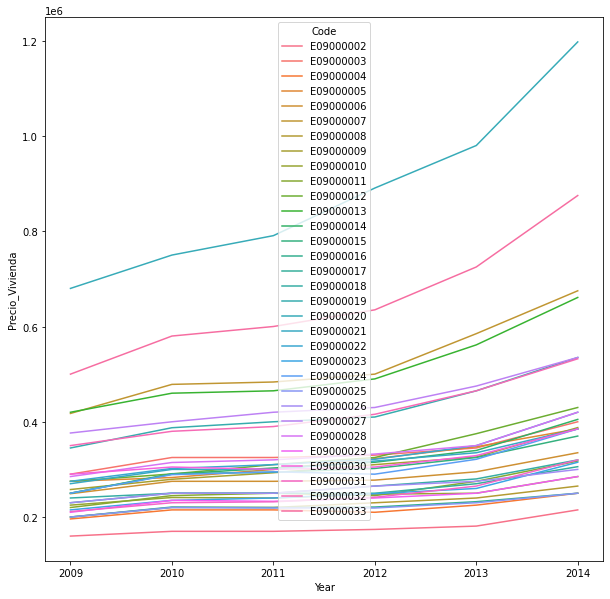

In [ ]:
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=p_vivienda, x="Year", y="Precio_Vivienda", hue="Code",ax=ax)

##DATASET CONSUMO ENERGETICO

In [ ]:
consumo = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/total-final-energy-consumption.xlsx')
consumo_test=pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/total-final-energy-consumption.xlsx')
consumo

Code                  Area  ...  Measurement       Value
0      E09000002  Barking and Dagenham  ...         Ktoe           0
1      E09000003                Barnet  ...         Ktoe           0
2      E09000004                Bexley  ...         Ktoe  0.00819482
3      E09000005                 Brent  ...         Ktoe           0
4      E09000006               Bromley  ...         Ktoe  0.00201073
...          ...                   ...  ...          ...         ...
23777  N92000002      Northern Ireland  ...          GWh           0
23778  W92000004                 Wales  ...          GWh           0
23779  S92000003              Scotland  ...          GWh           0
23780  E92000001               England  ...          GWh           0
23781  K02000001        United Kingdom  ...          GWh           0

[23782 rows x 7 columns]

###ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(consumo)

Cantidad de filas: 23782
Cantidad de columnas: 7
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006' 'E09000007'
 'E09000001' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Area
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: numérico
Descripción de valores:
min       2005.000000
max       2015.000000
mean      2010.000000
std          3.162344


###LIMPIEZA

In [ ]:
#Borramos las columnas que no necesitamos
consumo=consumo.loc[consumo["Measurement"]=="GWh"]
col_eliminar_consumo=["Area", "Measurement"]
consumo.drop(col_eliminar_consumo, inplace=True, axis=1)
consumo=consumo.astype("string")

consumo_test=consumo_test.loc[consumo_test["Measurement"]=="GWh"]
consumo_test.drop(col_eliminar_consumo, inplace=True, axis=1)
consumo_test=consumo_test.astype("string")


consumo

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Code  Year              Fuel                   Sector        Value
11891  E09000002  2005              Coal  Industrial & Commercial            0
11892  E09000003  2005              Coal  Industrial & Commercial            0
11893  E09000004  2005              Coal  Industrial & Commercial  0.095305777
11894  E09000005  2005              Coal  Industrial & Commercial            0
11895  E09000006  2005              Coal  Industrial & Commercial  0.023384762
...          ...   ...               ...                      ...          ...
23777  N92000002  2015  Consuming Sector                Transport            0
23778  W92000004  2015  Consuming Sector                Transport            0
23779  S92000003  2015  Consuming Sector                Transport            0
23780  E92000001  2015  Consuming Sector                Transport            0
23781  K02000001  2015  Consuming Sector                Transport            0

[11891 rows x 5 columns]

In [ ]:
consumo=consumo.loc[(consumo["Sector"]=="Total")]
consumo.drop("Sector", inplace=True, axis=1)

consumo_test=consumo_test.loc[(consumo_test["Sector"]=="Total")]
consumo_test.drop("Sector", inplace=True, axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
consumo["Code_true"]= consumo["Code"].str.contains('E09', na=False)
consumo=consumo.loc[(consumo["Code_true"]==True)]
consumo.drop("Code_true", inplace=True, axis=1)

consumo_test["Code_true"]= consumo_test["Code"].str.contains('E09', na=False)
consumo_test=consumo_test.loc[(consumo_test["Code_true"]==True)]
consumo_test.drop("Code_true", inplace=True, axis=1)


consumo["Code"].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000001', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033']
Length: 33, dtype: string

In [ ]:
consumo=consumo.loc[(consumo["Code"]!="E09000001")]

consumo_test=consumo_test.loc[(consumo_test["Code"]!="E09000001")]

In [ ]:
consumo= consumo.loc[(consumo["Year"]>="2009")&(consumo["Year"]<="2014")]
consumo_test= consumo_test.loc[(consumo_test["Year"]>="2015")&(consumo_test["Year"]<="2015")]

In [ ]:
#Creamos un dataset por cada tipo de energia consumida
consumo_coal=consumo.loc[consumo["Fuel"]=="Coal"]
consumo_coal=consumo_coal.rename(columns={"Value": "Coal"})
consumo_coal.drop("Fuel", inplace=True, axis=1)

consumo_manuf=consumo.loc[consumo["Fuel"]=="Manufactured fuels"]
consumo_manuf=consumo_manuf.rename(columns={"Value": "Manufacturer"})
consumo_manuf.drop("Fuel", inplace=True, axis=1)

consumo_petroleum=consumo.loc[consumo["Fuel"]=="Petroleum products"]
consumo_petroleum=consumo_petroleum.rename(columns={"Value": "Petroleum"})
consumo_petroleum.drop("Fuel", inplace=True, axis=1)

consumo_gas=consumo.loc[consumo["Fuel"]=="Gas"]
consumo_gas=consumo_gas.rename(columns={"Value": "Gas"})
consumo_gas.drop("Fuel", inplace=True, axis=1)

consumo_elect=consumo.loc[consumo["Fuel"]=="Electricity"]
consumo_elect=consumo_elect.rename(columns={"Value": "Electricity"})
consumo_elect.drop("Fuel", inplace=True, axis=1)

consumo_bio=consumo.loc[consumo["Fuel"]=="Bioenergy & wastes"]
consumo_bio=consumo_bio.rename(columns={"Value": "Bionergy"})
consumo_bio.drop("Fuel", inplace=True, axis=1)

In [ ]:
#Creamos un dataset por cada tipo de energia consumida
consumo_coal_test=consumo_test.loc[consumo_test["Fuel"]=="Coal"]
consumo_coal_test=consumo_coal_test.rename(columns={"Value": "Coal"})
consumo_coal_test.drop("Fuel", inplace=True, axis=1)

consumo_manuf_test=consumo_test.loc[consumo_test["Fuel"]=="Manufactured fuels"]
consumo_manuf_test=consumo_manuf_test.rename(columns={"Value": "Manufacturer"})
consumo_manuf_test.drop("Fuel", inplace=True, axis=1)

consumo_petroleum_test=consumo_test.loc[consumo_test["Fuel"]=="Petroleum products"]
consumo_petroleum_test=consumo_petroleum_test.rename(columns={"Value": "Petroleum"})
consumo_petroleum_test.drop("Fuel", inplace=True, axis=1)

consumo_gas_test=consumo_test.loc[consumo_test["Fuel"]=="Gas"]
consumo_gas_test=consumo_gas_test.rename(columns={"Value": "Gas"})
consumo_gas_test.drop("Fuel", inplace=True, axis=1)

consumo_elect_test=consumo_test.loc[consumo_test["Fuel"]=="Electricity"]
consumo_elect_test=consumo_elect_test.rename(columns={"Value": "Electricity"})
consumo_elect_test.drop("Fuel", inplace=True, axis=1)

consumo_bio_test=consumo_test.loc[consumo_test["Fuel"]=="Bioenergy & wastes"]
consumo_bio_test=consumo_bio_test.rename(columns={"Value": "Bionergy"})
consumo_bio_test.drop("Fuel", inplace=True, axis=1)

###UNION DATASETS

In [ ]:
dfs = [consumo_coal, consumo_manuf, consumo_petroleum, consumo_gas,consumo_elect,consumo_bio]
consumo_total = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)

dfs_test = [consumo_coal_test, consumo_manuf_test, consumo_petroleum_test, consumo_gas_test,consumo_elect_test,consumo_bio_test]
consumo_total_test = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs_test)

consumo_total

Code  Year         Coal  ...          Gas  Electricity            Bionergy
0    E09000002  2009  3.309006872  ...  1046.602502   722.240579  22.851526905599997
1    E09000003  2009  1.611894211  ...   2992.22694  1197.355037                   0
2    E09000004  2009  1.747327201  ...  2103.840947   806.668556          26.7132367
3    E09000005  2009  0.938093816  ...  2214.778794  1246.328279                   0
4    E09000006  2009  3.303843216  ...  2661.590506  1057.328155         1.093800678
..         ...   ...          ...  ...          ...          ...                 ...
187  E09000029  2014  2.310309154  ...  1240.780327  689.9304397                   0
188  E09000030  2014   1.08322651  ...  1299.364413   2940.04673         34.56104708
189  E09000031  2014  1.635069008  ...   1480.79008  772.2723959                   0
190  E09000032  2014  0.820423992  ...  2098.079984  1057.114796                   0
191  E09000033  2014  1.255759139  ...  3040.711628  3988.493698                   0

[192 rows x 8 columns]

In [ ]:
consumo_total["Code"]=consumo_total["Code"].astype("string")
consumo_total["Year"]=consumo_total["Year"].astype(int)
consumo_total["Coal"]=consumo_total["Coal"].astype(float)
consumo_total["Manufacturer"]=consumo_total["Manufacturer"].astype(float)
consumo_total["Petroleum"]=consumo_total["Petroleum"].astype(float)
consumo_total["Gas"]=consumo_total["Gas"].astype(float)
consumo_total["Electricity"]=consumo_total["Electricity"].astype(float)
consumo_total["Bionergy"]=consumo_total["Bionergy"].astype(float)


consumo_total_test["Code"]=consumo_total_test["Code"].astype("string")
consumo_total_test["Year"]=consumo_total_test["Year"].astype(int)
consumo_total_test["Coal"]=consumo_total_test["Coal"].astype(float)
consumo_total_test["Manufacturer"]=consumo_total_test["Manufacturer"].astype(float)
consumo_total_test["Petroleum"]=consumo_total_test["Petroleum"].astype(float)
consumo_total_test["Gas"]=consumo_total_test["Gas"].astype(float)
consumo_total_test["Electricity"]=consumo_total_test["Electricity"].astype(float)
consumo_total_test["Bionergy"]=consumo_total_test["Bionergy"].astype(float)



consumo_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code          192 non-null    string 
 1   Year          192 non-null    int64  
 2   Coal          192 non-null    float64
 3   Manufacturer  192 non-null    float64
 4   Petroleum     192 non-null    float64
 5   Gas           192 non-null    float64
 6   Electricity   192 non-null    float64
 7   Bionergy      192 non-null    float64
dtypes: float64(6), int64(1), string(1)
memory usage: 13.5 KB


###VISUALIZACION

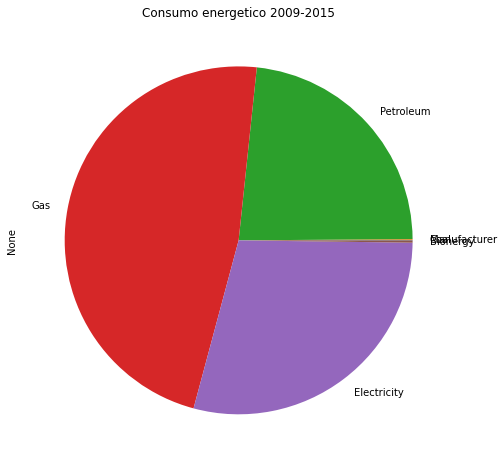

In [ ]:
a4_dims = (8, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
consumo_total[consumo_total.columns[2:]].sum().plot.pie(ax=ax, title="Consumo energetico 2009-2015")

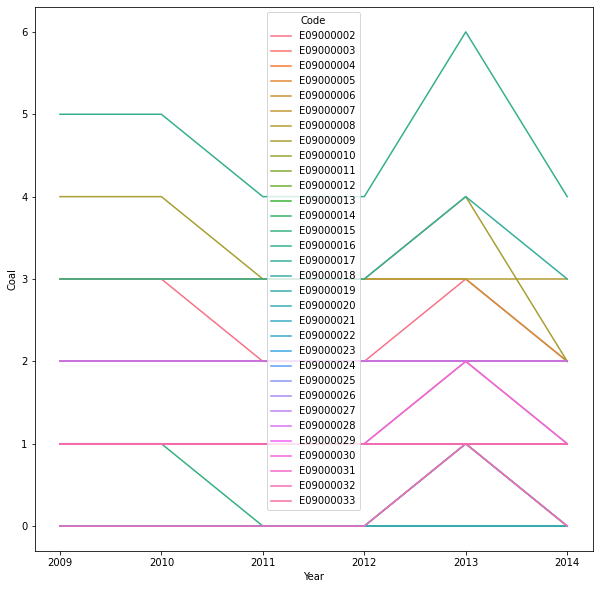

In [ ]:
a4_dims = (10, 10)
consumo_total["Coal"]=consumo_total["Coal"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Coal", hue="Code",ax=ax)

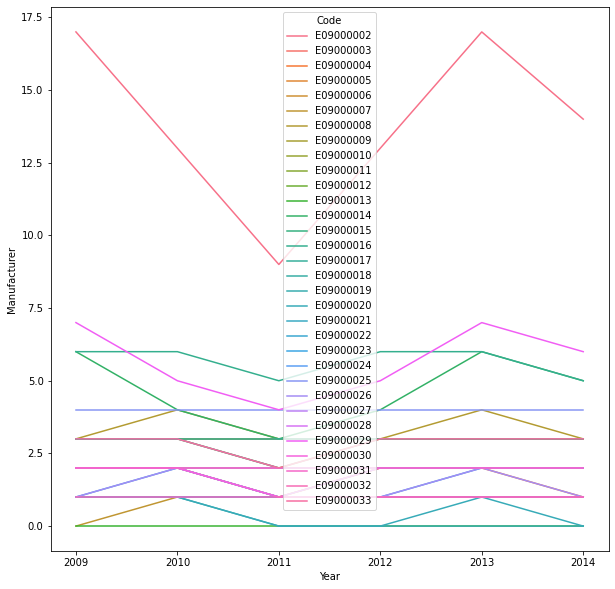

In [ ]:
consumo_total["Manufacturer"]=consumo_total["Manufacturer"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Manufacturer", hue="Code",ax=ax)

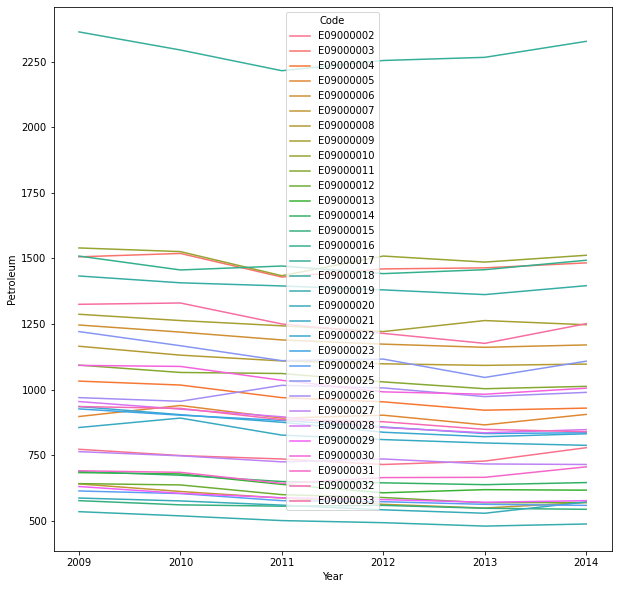

In [ ]:
consumo_total["Petroleum"]=consumo_total["Petroleum"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Petroleum", hue="Code",ax=ax)

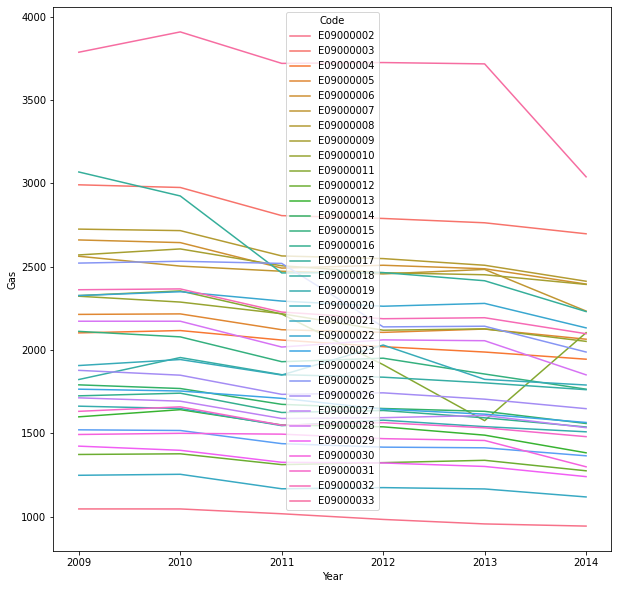

In [ ]:
consumo_total["Gas"]=consumo_total["Gas"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Gas", hue="Code",ax=ax)

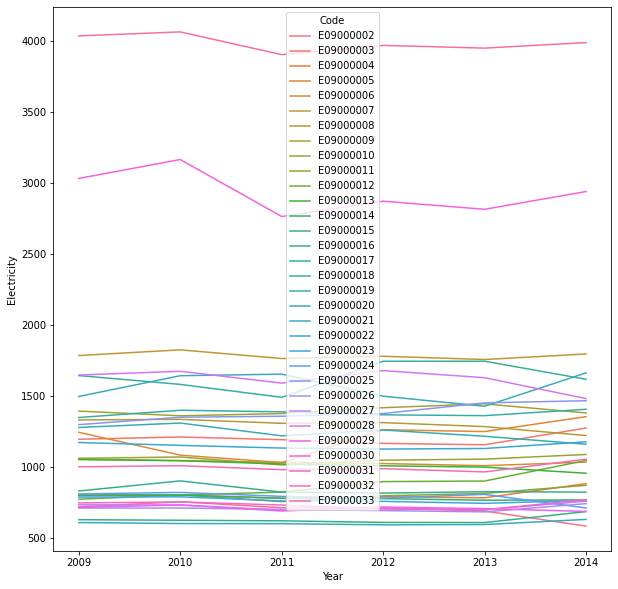

In [ ]:
consumo_total["Electricity"]=consumo_total["Electricity"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Electricity", hue="Code",ax=ax)

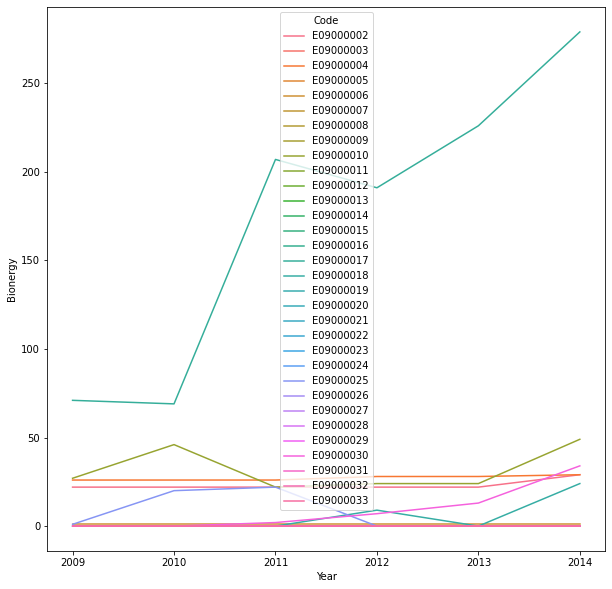

In [ ]:
consumo_total["Bionergy"]=consumo_total["Bionergy"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=consumo_total, x="Year", y="Bionergy", hue="Code",ax=ax)

##DATASET FESTIVOS

In [ ]:
festivos = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/Bank-holidays.xlsx')
festivos_test=pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/Bank-holidays.xlsx')

festivos

Date           Holiday-Event
0  2009-01-01          New Year's Day
1  2009-04-09    Previous Good Friday
2  2009-04-10             Good Friday
3  2009-04-13           Easter Monday
4  2009-05-04  Early May bank holiday
..        ...                     ...
77 2015-11-05          Guy Fawkes Day
78 2015-12-24  Previous Christmas Day
79 2015-12-25           Christmas Day
80 2015-12-26              Boxing Day
81 2015-12-28        Boxing Day-moved

[82 rows x 2 columns]

###ANALISIS DE DATOS

In [ ]:
descripcionDatosDataset(festivos)

Cantidad de filas: 82
Cantidad de columnas: 2
----------------------------------------------------------------------------------------------------
Columna: Date
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['2009-01-01T00:00:00.000000000' '2009-04-09T00:00:00.000000000'
 '2009-04-10T00:00:00.000000000' '2009-04-13T00:00:00.000000000'
 '2009-05-04T00:00:00.000000000' '2009-05-25T00:00:00.000000000'
 '2009-08-31T00:00:00.000000000' '2009-11-05T00:00:00.000000000'
 '2009-12-25T00:00:00.000000000' '2009-12-26T00:00:00.000000000']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Holiday-Event
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ["New Year's Day" 'Previous Good Friday' 'Good Friday' 'Easter Monday'
 'Early May bank holiday' 'Late May bank holiday' 'August Bank Holidays'
 'Guy Fawkes Day' 'Christmas Day' 'Boxing Day']

###LIMPIEZA

In [ ]:
festivos["Date"]=festivos["Date"].astype("string")

festivos_test["Date"]=festivos_test["Date"].astype("string")

In [ ]:
#Cambio el formato de la fercha de los crimenes solo no interesa el anyo
festivos["Mes"]=festivos["Date"].map(lambda x: str(x)[5:-3])
festivos["Dia"]=festivos["Date"].map(lambda x: str(x)[8:])
festivos["Year"]=festivos["Date"].map(lambda x: str(x)[:4])
festivos.drop("Date", inplace=True, axis=1)

festivos_test["Mes"]=festivos_test["Date"].map(lambda x: str(x)[5:-3])
festivos_test["Dia"]=festivos_test["Date"].map(lambda x: str(x)[8:])
festivos_test["Year"]=festivos_test["Date"].map(lambda x: str(x)[:4])
festivos_test.drop("Date", inplace=True, axis=1)



festivos["Year"]

0     2009
1     2009
2     2009
3     2009
4     2009
      ... 
77    2015
78    2015
79    2015
80    2015
81    2015
Name: Year, Length: 82, dtype: object

In [ ]:
festivos["Dia"]=festivos["Dia"].astype(int)
festivos["Mes"]=festivos["Mes"].astype(int)
festivos["Year"]=festivos["Year"].astype(int)

festivos_test["Dia"]=festivos_test["Dia"].astype(int)
festivos_test["Mes"]=festivos_test["Mes"].astype(int)
festivos_test["Year"]=festivos_test["Year"].astype(int)

In [ ]:
festivos["Festivo"]=True

festivos_test["Festivo"]=True

In [ ]:
festivos.drop("Holiday-Event", inplace=True, axis=1)

festivos_test.drop("Holiday-Event", inplace=True, axis=1)

In [ ]:
festivos= festivos.loc[(festivos["Year"]>=2014)&(festivos["Year"]<=2009)]

festivos_test= festivos_test.loc[(festivos_test["Year"]>=2015)&(festivos_test["Year"]<=2015)]

In [ ]:
festivos

Empty DataFrame
Columns: [Mes, Dia, Year, Festivo]
Index: []

#DATASET UNIDO

Unimos todos los dataset, usaremos el codigo del barrio como referencia y el anyo

###UNION DATASETS

In [ ]:
llamadas.shape


(469277, 14)

In [ ]:
dfs = [llamadas, viviendas_tr]
df = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)


dfs_test = [llamadas_test, viviendas__test_tr]
df_test = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs_test)

df

IncGeo_WardNameNew  Year Postcode_full  ... Mes Dia Ingreso_Vivienda
0                   Abbey  2009      IG11 8JG  ...   1   1                5
1                  Alibon  2009          None  ...   1   1                5
2               Becontree  2009       RM8 2UL  ...   1   1                5
3               Gascoigne  2009      IG11 7BA  ...   1   1                5
4                   Heath  2009      RM10 7PT  ...   1   1                5
...                   ...   ...           ...  ...  ..  ..              ...
469272        Harold Wood  2014      RM14 1TP  ...  12  31                7
469273      Havering Park  2014          None  ...  12  31                7
469274       Romford Town  2014       RM7 0FP  ...  12  31                7
469275   South Hornchurch  2014      RM13 7XH  ...  12  31                7
469276   Squirrel's Heath  2014          None  ...  12  31                7

[469277 rows x 15 columns]

In [ ]:
#Unimos los dataset por el codigo y el anyo
df = pd.merge(df, densidad, how="outer")

df_test = pd.merge(df_test, densidad_test, how="outer")

df

IncGeo_WardNameNew  Year  ... Poblacion Area_m2
0                   Abbey  2009  ...    177580      36
1                  Alibon  2009  ...    177580      36
2               Becontree  2009  ...    177580      36
3               Gascoigne  2009  ...    177580      36
4                   Heath  2009  ...    177580      36
...                   ...   ...  ...       ...     ...
469272        Harold Wood  2014  ...    246328     112
469273      Havering Park  2014  ...    246328     112
469274       Romford Town  2014  ...    246328     112
469275   South Hornchurch  2014  ...    246328     112
469276   Squirrel's Heath  2014  ...    246328     112

[469277 rows x 17 columns]

In [ ]:
#Unimos los dataset por el codigo y el anyo

df = pd.merge(df,crimenes_total, how="outer")

df_test = pd.merge(df_test,crimenes_total_test, how="outer")

df

IncGeo_WardNameNew  Year  ... Crim_Drogas Crim_Otros
0                   Abbey  2009  ...        1133        352
1                  Alibon  2009  ...        1133        352
2               Becontree  2009  ...        1133        352
3               Gascoigne  2009  ...        1133        352
4                   Heath  2009  ...        1133        352
...                   ...   ...  ...         ...        ...
469272        Harold Wood  2014  ...         720        336
469273      Havering Park  2014  ...         720        336
469274       Romford Town  2014  ...         720        336
469275   South Hornchurch  2014  ...         720        336
469276   Squirrel's Heath  2014  ...         720        336

[469277 rows x 26 columns]

In [ ]:
#Unimos los dataset por el codigo y el anyo

df = pd.merge(df,p_vivienda, how="outer")

df_test = pd.merge(df_test,p_vivienda_test, how="outer")
df

IncGeo_WardNameNew  Year  ... Crim_Otros Precio_Vivienda
0                   Abbey  2009  ...        352          160000
1                  Alibon  2009  ...        352          160000
2               Becontree  2009  ...        352          160000
3               Gascoigne  2009  ...        352          160000
4                   Heath  2009  ...        352          160000
...                   ...   ...  ...        ...             ...
469272        Harold Wood  2014  ...        336          250000
469273      Havering Park  2014  ...        336          250000
469274       Romford Town  2014  ...        336          250000
469275   South Hornchurch  2014  ...        336          250000
469276   Squirrel's Heath  2014  ...        336          250000

[469277 rows x 27 columns]

In [ ]:
#Unimos los dataset por el codigo y el anyo

df = pd.merge(df,consumo_total, how="outer")

df_test = pd.merge(df_test,consumo_total_test, how="outer")

df

IncGeo_WardNameNew  Year Postcode_full  ...   Gas Electricity Bionergy
0                   Abbey  2009      IG11 8JG  ...  1046         722       22
1                  Alibon  2009          None  ...  1046         722       22
2               Becontree  2009       RM8 2UL  ...  1046         722       22
3               Gascoigne  2009      IG11 7BA  ...  1046         722       22
4                   Heath  2009      RM10 7PT  ...  1046         722       22
...                   ...   ...           ...  ...   ...         ...      ...
469272        Harold Wood  2014      RM14 1TP  ...  1538         825        0
469273      Havering Park  2014          None  ...  1538         825        0
469274       Romford Town  2014       RM7 0FP  ...  1538         825        0
469275   South Hornchurch  2014      RM13 7XH  ...  1538         825        0
469276   Squirrel's Heath  2014          None  ...  1538         825        0

[469277 rows x 33 columns]

In [ ]:
#Unimos los dataset de los festivos
df =  pd.merge(df,festivos, how="outer")


df_test =  pd.merge(df_test,festivos_test, how="outer")

df

IncGeo_WardNameNew  Year Postcode_full  ... Electricity Bionergy Festivo
0                   Abbey  2009      IG11 8JG  ...         722       22     NaN
1                  Alibon  2009          None  ...         722       22     NaN
2               Becontree  2009       RM8 2UL  ...         722       22     NaN
3               Gascoigne  2009      IG11 7BA  ...         722       22     NaN
4                   Heath  2009      RM10 7PT  ...         722       22     NaN
...                   ...   ...           ...  ...         ...      ...     ...
469272       Rayners Lane  2014       HA2 9RY  ...         688        0     NaN
469273          Southbury  2014       EN1 3PN  ...        1090       49     NaN
469274      Turkey Street  2014       EN1 4SB  ...        1090       49     NaN
469275     Northwick Park  2014       HA1 3TP  ...        1356        0     NaN
469276    Wembley Central  2014          None  ...        1356        0     NaN

[469277 rows x 34 columns]

In [ ]:
df=df[["Year", "Mes", "Dia","Festivo","IncGeo_WardNameNew","Code", "Postcode_full", "Postcode_district","ProperCase","IncGeo_WardCode","Easting_rounded", "Northing_rounded", "Ingreso_Vivienda", "Precio_Vivienda","Poblacion", "Area_m2", "Crim_Violencia", "Crim_Sexual", "Crim_Robos", "Crim_Robos_casas", "Crim_ladrones", "Crim_Fraude", "Crim_Danyo", "Crim_Drogas", "Crim_Otros",  "Coal", "Manufacturer", "Petroleum", "Gas", "Electricity", "Bionergy", "Num_Fire", "Num_Falsa_A", "Num_Service"]]

###ANALISIS DEL DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469277 entries, 0 to 469276
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Year                469277 non-null  int64 
 1   Mes                 469277 non-null  int64 
 2   Dia                 469277 non-null  int64 
 3   Festivo             0 non-null       object
 4   IncGeo_WardNameNew  469277 non-null  object
 5   Code                469277 non-null  object
 6   Postcode_full       277728 non-null  object
 7   Postcode_district   469277 non-null  object
 8   ProperCase          469277 non-null  object
 9   IncGeo_WardCode     469277 non-null  object
 10  Easting_rounded     469277 non-null  int64 
 11  Northing_rounded    469277 non-null  int64 
 12  Ingreso_Vivienda    469277 non-null  int64 
 13  Precio_Vivienda     469277 non-null  int64 
 14  Poblacion           469277 non-null  int64 
 15  Area_m2             469277 non-null  int64 
 16  Cr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f522f7e4a50>,
      dtype=object)

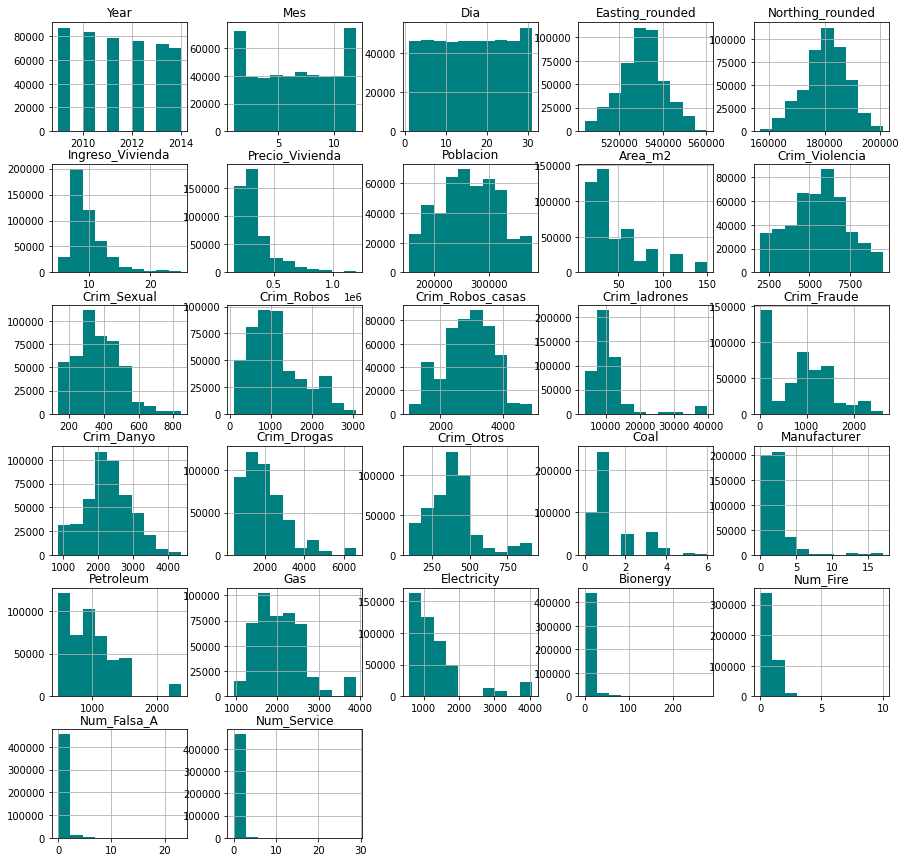

In [ ]:
df.hist(figsize=(15,15), color="#008080")

In [ ]:
# Otra forma de representar la distrubicion tambien muy visual
#df.plot(kind='density', subplots=True, layout=(10,4), sharex=False, figsize=(15,20))
plt.show()

In [ ]:
df.describe()

Year            Mes  ...    Num_Falsa_A    Num_Service
count  469277.000000  469277.000000  ...  469277.000000  469277.000000
mean     2011.371220       6.540269  ...       0.692825       0.433482
std         1.707889       3.394707  ...       0.832352       0.615261
min      2009.000000       1.000000  ...       0.000000       0.000000
25%      2010.000000       4.000000  ...       0.000000       0.000000
50%      2011.000000       7.000000  ...       1.000000       0.000000
75%      2013.000000       9.000000  ...       1.000000       1.000000
max      2014.000000      12.000000  ...      23.000000      29.000000

[8 rows x 27 columns]

##VALORES PERDIDOS

In [ ]:
# Buscamos valores perdidos
df.isna().sum()

Year                       0
Mes                        0
Dia                        0
Festivo               469277
IncGeo_WardNameNew         0
Code                       0
Postcode_full         191549
Postcode_district          0
ProperCase                 0
IncGeo_WardCode            0
Easting_rounded            0
Northing_rounded           0
Ingreso_Vivienda           0
Precio_Vivienda            0
Poblacion                  0
Area_m2                    0
Crim_Violencia             0
Crim_Sexual                0
Crim_Robos                 0
Crim_Robos_casas           0
Crim_ladrones              0
Crim_Fraude                0
Crim_Danyo                 0
Crim_Drogas                0
Crim_Otros                 0
Coal                       0
Manufacturer               0
Petroleum                  0
Gas                        0
Electricity                0
Bionergy                   0
Num_Fire                   0
Num_Falsa_A                0
Num_Service                0
dtype: int64

In [ ]:
n=[]
for i in df["Festivo"]:
  if i != True:
    n.append(0)
  else:
    n.append(1) 

df["Festivo"]=n
df["Festivo"]

0         0
1         0
2         0
3         0
4         0
         ..
469272    0
469273    0
469274    0
469275    0
469276    0
Name: Festivo, Length: 469277, dtype: int64

In [ ]:
n_test=[]
for i in df_test["Festivo"]:
  if i != True:
    n_test.append(0)
  else:
    n_test.append(1) 

df_test["Festivo"]=n_test
df_test["Festivo"]

0        1
1        1
2        1
3        1
4        1
        ..
71162    0
71163    0
71164    0
71165    0
71166    0
Name: Festivo, Length: 71167, dtype: int64

In [ ]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

Year  Mes  Dia  Festivo  ... Bionergy Num_Fire Num_Falsa_A Num_Service
1       2009    1    1        0  ...       22        0           1           0
8       2009    1    1        0  ...        0        0           1           0
13      2009    1    1        0  ...        0        0           1           0
15      2009    1    1        0  ...        0        0           1           0
17      2009    1    1        0  ...        0        0           1           0
...      ...  ...  ...      ...  ...      ...      ...         ...         ...
469267  2014   11    3        0  ...        0        1           0           0
469268  2014   11    3        0  ...       29        1           0           0
469269  2014   11    3        0  ...       29        1           0           0
469270  2014   11    3        0  ...        0        0           1           0
469276  2014   11    3        0  ...        0        0           1           0

[191549 rows x 34 columns]

## VALORES CATEGORICOS

In [ ]:
df["IncGeo_WardCode"].unique()  

array(['E05000026', 'E05000027', 'E05000028', 'E05000032', 'E05000034',
       'E05000039', 'E05000040', 'E05000041', 'E05000630', 'E05000631',
       'E05000632', 'E05000636', 'E05000638', 'E05000639', 'E05000641',
       'E05000643', 'E05000644', 'E05000645', 'E05000646', 'E05000647',
       'E05000649', 'E05000648', 'E05000250', 'E05000252', 'E05000253',
       'E05000254', 'E05000256', 'E05000258', 'E05000259', 'E05000260',
       'E05000495', 'E05000498', 'E05000499', 'E05000502', 'E05000504',
       'E05000506', 'E05000507', 'E05000510', 'E05000513', 'E05000515',
       'E05000266', 'E05000267', 'E05000268', 'E05000272', 'E05000275',
       'E05000276', 'E05000277', 'E05000280', 'E05000281', 'E05000516',
       'E05000517', 'E05000518', 'E05000522', 'E05000524', 'E05000529',
       'E05000531', 'E05000324', 'E05000325', 'E05000331', 'E05000332',
       'E05000335', 'E05000337', 'E05000366', 'E05000367', 'E05000368',
       'E05000370', 'E05000371', 'E05000375', 'E05000378', 'E050

In [ ]:
labelencoder=LabelEncoder()
df["IncGeo_WardCode_C"] = labelencoder.fit_transform(df["IncGeo_WardCode"])

df_test["IncGeo_WardCode_C"] = labelencoder.fit_transform(df_test["IncGeo_WardCode"])



df

Year  Mes  Dia  ...  Num_Falsa_A Num_Service IncGeo_WardCode_C
0       2009    1    1  ...            0           0                 0
1       2009    1    1  ...            1           0                 1
2       2009    1    1  ...            0           0                 2
3       2009    1    1  ...            1           1                 6
4       2009    1    1  ...            0           0                 8
...      ...  ...  ...  ...          ...         ...               ...
469272  2014   11    3  ...            1           0               255
469273  2014   11    3  ...            0           1               181
469274  2014   11    3  ...            0           1               185
469275  2014   11    3  ...            0           0                70
469276  2014   11    3  ...            1           0                78

[469277 rows x 35 columns]

In [ ]:
labelencoder=LabelEncoder()
df["Code_C"] = labelencoder.fit_transform(df["Code"])

df_test["Code_C"] = labelencoder.fit_transform(df_test["Code"])

df

Year  Mes  Dia  ...  Num_Service IncGeo_WardCode_C Code_C
0       2009    1    1  ...            0                 0      0
1       2009    1    1  ...            0                 1      0
2       2009    1    1  ...            0                 2      0
3       2009    1    1  ...            1                 6      0
4       2009    1    1  ...            0                 8      0
...      ...  ...  ...  ...          ...               ...    ...
469272  2014   11    3  ...            0               255     13
469273  2014   11    3  ...            1               181      8
469274  2014   11    3  ...            1               185      8
469275  2014   11    3  ...            0                70      3
469276  2014   11    3  ...            0                78      3

[469277 rows x 36 columns]

In [ ]:
labelencoder=LabelEncoder()
df["Distrito_C"] = labelencoder.fit_transform(df["Postcode_district"])

df_test["Distrito_C"] = labelencoder.fit_transform(df_test["Postcode_district"])

df

Year  Mes  Dia  ...  IncGeo_WardCode_C Code_C Distrito_C
0       2009    1    1  ...                  0      0         87
1       2009    1    1  ...                  1      0        143
2       2009    1    1  ...                  2      0        155
3       2009    1    1  ...                  6      0         87
4       2009    1    1  ...                  8      0        143
...      ...  ...  ...  ...                ...    ...        ...
469272  2014   11    3  ...                255     13         78
469273  2014   11    3  ...                181      8         67
469274  2014   11    3  ...                185      8         67
469275  2014   11    3  ...                 70      3         77
469276  2014   11    3  ...                 78      3         76

[469277 rows x 37 columns]

In [ ]:
labelencoder=LabelEncoder()
df["Barrio_Nuevo_C"] = labelencoder.fit_transform(df["IncGeo_WardNameNew"])

df_test["Barrio_Nuevo_C"] = labelencoder.fit_transform(df_test["IncGeo_WardNameNew"])

df

Year  Mes  Dia  ...  Code_C Distrito_C Barrio_Nuevo_C
0       2009    1    1  ...       0         87              0
1       2009    1    1  ...       0        143              9
2       2009    1    1  ...       0        155             23
3       2009    1    1  ...       0         87            218
4       2009    1    1  ...       0        143            271
...      ...  ...  ...  ...     ...        ...            ...
469272  2014   11    3  ...      13         78            433
469273  2014   11    3  ...       8         67            473
469274  2014   11    3  ...       8         67            547
469275  2014   11    3  ...       3         77            388
469276  2014   11    3  ...       3         76            576

[469277 rows x 38 columns]

In [ ]:
labelencoder=LabelEncoder()
df["Proper_C"] = labelencoder.fit_transform(df["ProperCase"])

df_test["Proper_C"] = labelencoder.fit_transform(df_test["ProperCase"])
df

Year  Mes  Dia  Festivo  ... Code_C Distrito_C Barrio_Nuevo_C Proper_C
0       2009    1    1        0  ...      0         87              0        0
1       2009    1    1        0  ...      0        143              9        0
2       2009    1    1        0  ...      0        155             23        0
3       2009    1    1        0  ...      0         87            218        0
4       2009    1    1        0  ...      0        143            271        0
...      ...  ...  ...      ...  ...    ...        ...            ...      ...
469272  2014   11    3        0  ...     13         78            433       13
469273  2014   11    3        0  ...      8         67            473        8
469274  2014   11    3        0  ...      8         67            547        8
469275  2014   11    3        0  ...      3         77            388        3
469276  2014   11    3        0  ...      3         76            576        3

[469277 rows x 39 columns]

##CORRELACIONES

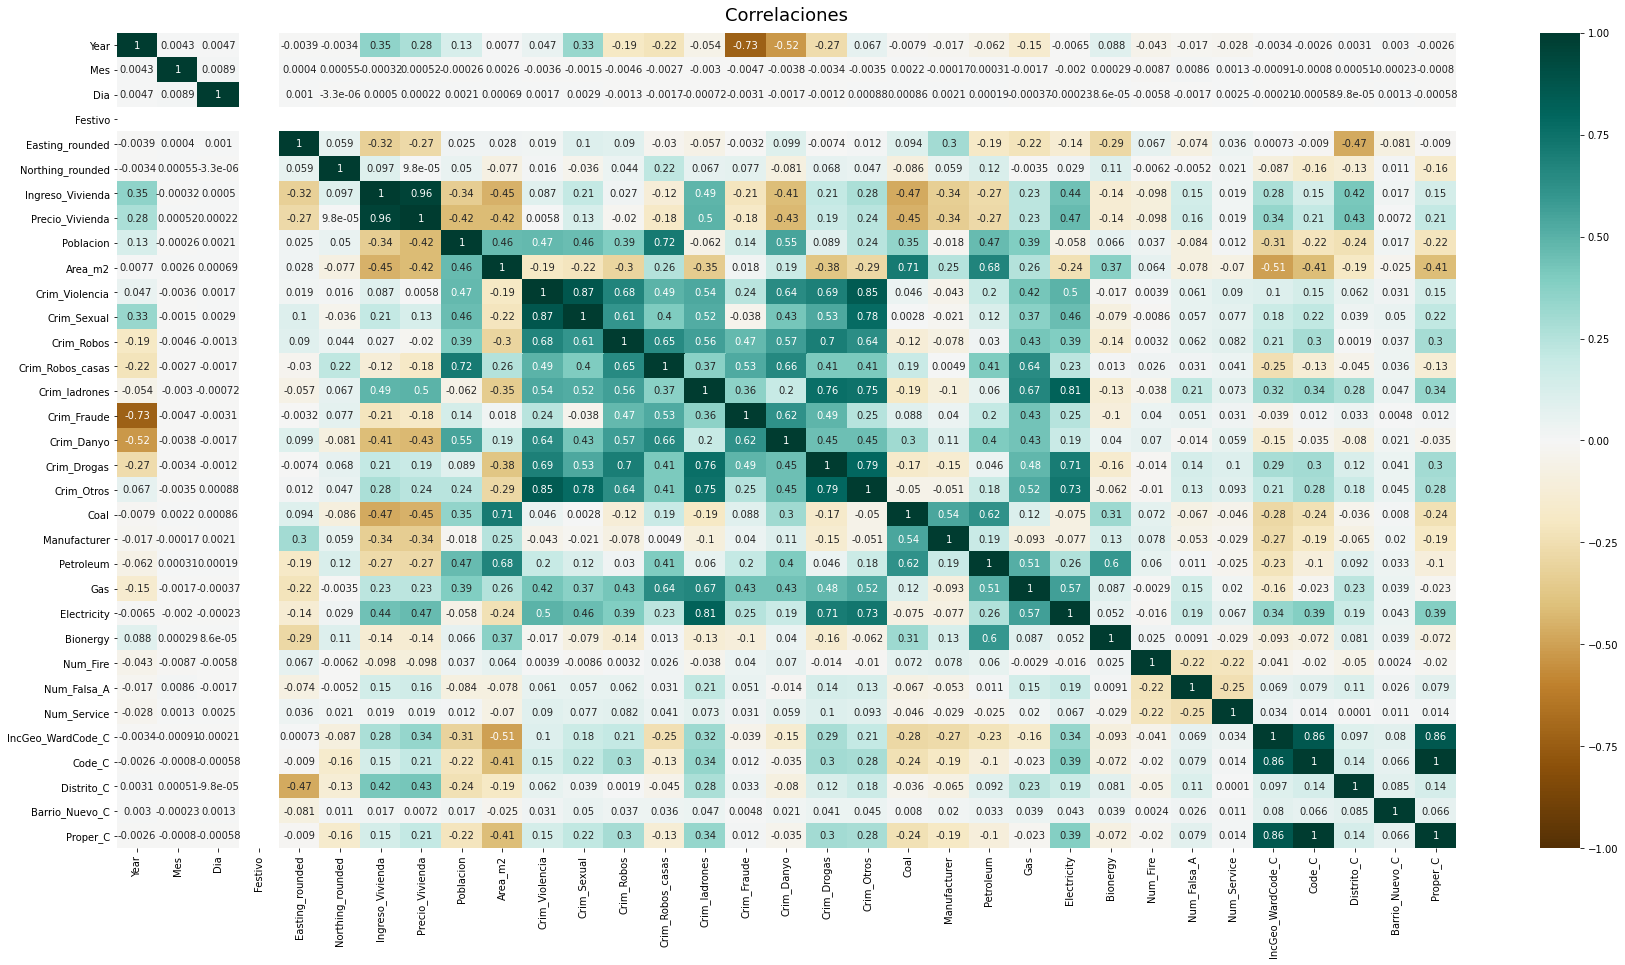

In [ ]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

0.00-0.19: very weak

0.20-0.39: weak

0.40-0.59: moderate 

0.60-0.79: strong

0.80-1.00: very strong

In [ ]:
#>0.75
df_correl=["Crim_Fraude", "Precio_Vivienda", "Crim_Sexual", "Crim_Otros", "Crim_Drogas", "Proper_C","Crim_ladrones","IncGeo_WardCode_C"]
df.drop(df_correl, inplace=True, axis=1)
df_test.drop(df_correl, inplace=True, axis=1)

In [ ]:
df

Year  Mes  Dia  ...  Code_C Distrito_C Barrio_Nuevo_C
0       2009    1    1  ...       0         87              0
1       2009    1    1  ...       0        143              9
2       2009    1    1  ...       0        155             23
3       2009    1    1  ...       0         87            218
4       2009    1    1  ...       0        143            271
...      ...  ...  ...  ...     ...        ...            ...
469272  2014   11    3  ...      13         78            433
469273  2014   11    3  ...       8         67            473
469274  2014   11    3  ...       8         67            547
469275  2014   11    3  ...       3         77            388
469276  2014   11    3  ...       3         76            576

[469277 rows x 31 columns]

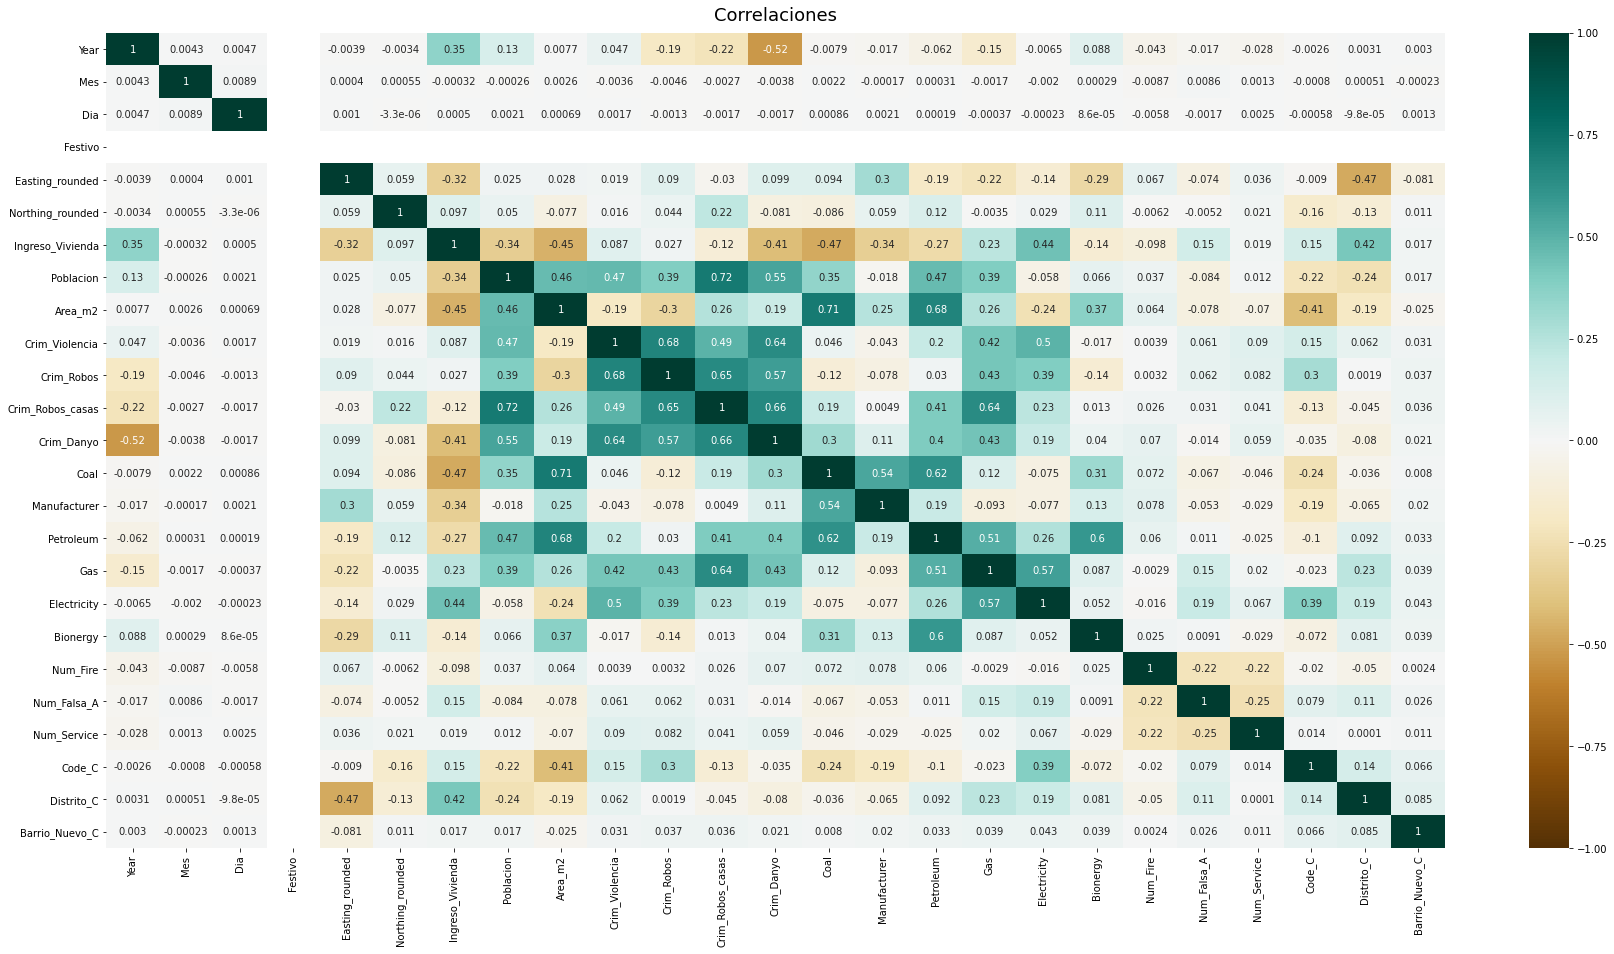

In [ ]:
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlaciones', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469277 entries, 0 to 469276
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Year                469277 non-null  int64 
 1   Mes                 469277 non-null  int64 
 2   Dia                 469277 non-null  int64 
 3   Festivo             469277 non-null  int64 
 4   IncGeo_WardNameNew  469277 non-null  object
 5   Code                469277 non-null  object
 6   Postcode_full       277728 non-null  object
 7   Postcode_district   469277 non-null  object
 8   ProperCase          469277 non-null  object
 9   IncGeo_WardCode     469277 non-null  object
 10  Easting_rounded     469277 non-null  int64 
 11  Northing_rounded    469277 non-null  int64 
 12  Ingreso_Vivienda    469277 non-null  int64 
 13  Poblacion           469277 non-null  int64 
 14  Area_m2             469277 non-null  int64 
 15  Crim_Violencia      469277 non-null  int64 
 16  Cr

##OUTLIERS

In [ ]:
#for column in df:
#  if column != "code":
#    plt.figure()
#    df.boxplot([column])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469277 entries, 0 to 469276
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Year                469277 non-null  int64 
 1   Mes                 469277 non-null  int64 
 2   Dia                 469277 non-null  int64 
 3   Festivo             469277 non-null  int64 
 4   IncGeo_WardNameNew  469277 non-null  object
 5   Code                469277 non-null  object
 6   Postcode_full       277728 non-null  object
 7   Postcode_district   469277 non-null  object
 8   ProperCase          469277 non-null  object
 9   IncGeo_WardCode     469277 non-null  object
 10  Easting_rounded     469277 non-null  int64 
 11  Northing_rounded    469277 non-null  int64 
 12  Ingreso_Vivienda    469277 non-null  int64 
 13  Poblacion           469277 non-null  int64 
 14  Area_m2             469277 non-null  int64 
 15  Crim_Violencia      469277 non-null  int64 
 16  Cr

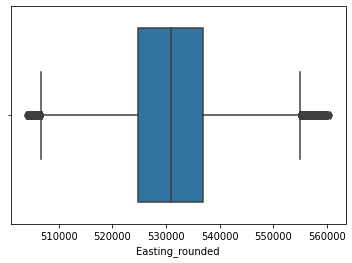

In [ ]:
sns.boxplot(x=df["Easting_rounded"])


In [ ]:
#df.loc[(df["Easting_rounded"]>555000)].count()


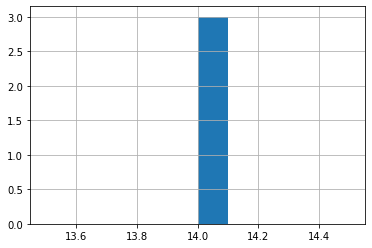

In [ ]:
df.loc[(df["Easting_rounded"]>560000)]["Code_C"].hist()

In [ ]:
df.loc[(df["Easting_rounded"]<510000)].count()

Year                  12845
Mes                   12845
Dia                   12845
Festivo               12845
IncGeo_WardNameNew    12845
Code                  12845
Postcode_full          9774
Postcode_district     12845
ProperCase            12845
IncGeo_WardCode       12845
Easting_rounded       12845
Northing_rounded      12845
Ingreso_Vivienda      12845
Poblacion             12845
Area_m2               12845
Crim_Violencia        12845
Crim_Robos            12845
Crim_Robos_casas      12845
Crim_Danyo            12845
Coal                  12845
Manufacturer          12845
Petroleum             12845
Gas                   12845
Electricity           12845
Bionergy              12845
Num_Fire              12845
Num_Falsa_A           12845
Num_Service           12845
Code_C                12845
Distrito_C            12845
Barrio_Nuevo_C        12845
dtype: int64

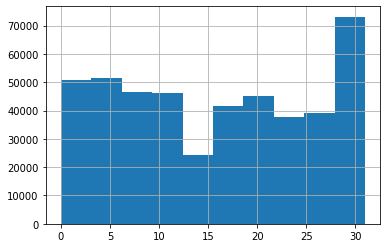

In [ ]:
#df.loc[(df["Easting_rounded"]>510000)].groupby("Llamadas_Code").count()
df.loc[(df["Easting_rounded"]>510000)]["Code_C"].hist()

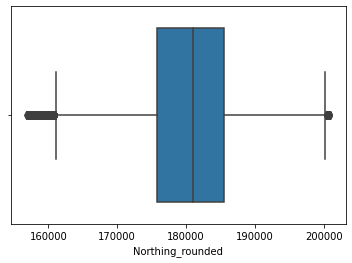

In [ ]:
sns.boxplot(x=df["Northing_rounded"])

In [ ]:
#df.loc[(df["Northing_rounded"]<165000)].count()

In [ ]:
#df.loc[(df["Northing_rounded"]>195000)].count()

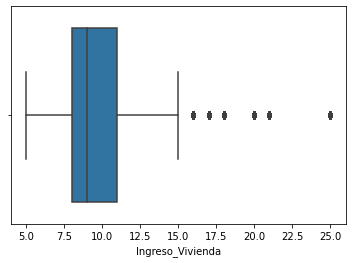

In [ ]:
sns.boxplot(x=df["Ingreso_Vivienda"])

In [ ]:
#df.loc[(df["Ingreso_Vivienda"]>17)].count()

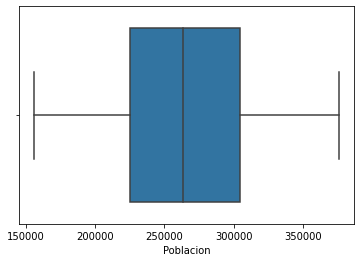

In [ ]:
sns.boxplot(x=df["Poblacion"])

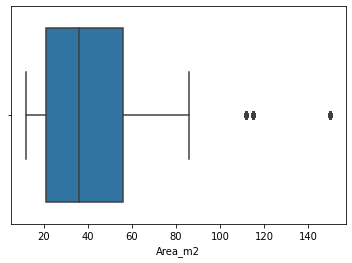

In [ ]:
sns.boxplot(x=df["Area_m2"])

In [ ]:
#df.loc[(df["Area_m2"]>90)].count()

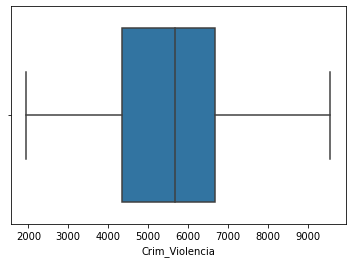

In [ ]:
sns.boxplot(x=df["Crim_Violencia"])

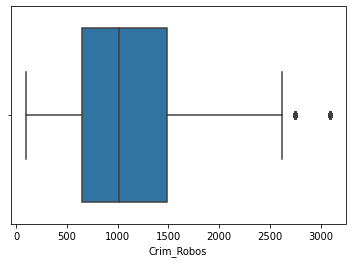

In [ ]:
sns.boxplot(x=df["Crim_Robos"])

In [ ]:
#df.loc[(df["Crim_Robos"]>2600)].count()

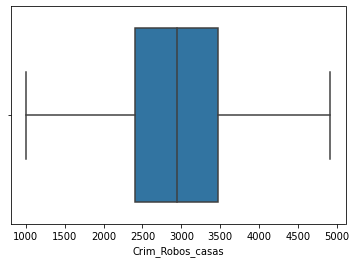

In [ ]:
sns.boxplot(x=df["Crim_Robos_casas"])

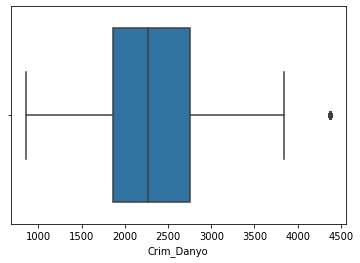

In [ ]:
sns.boxplot(x=df["Crim_Danyo"])

In [ ]:
#df.loc[(df["Crim_Danyo"]>3800)].count()

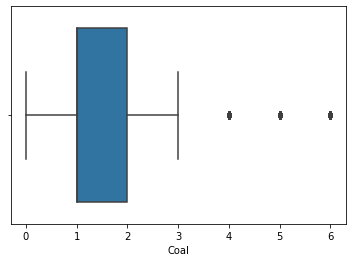

In [ ]:
sns.boxplot(x=df["Coal"])

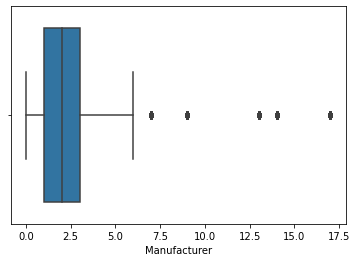

In [ ]:
sns.boxplot(x=df["Manufacturer"])

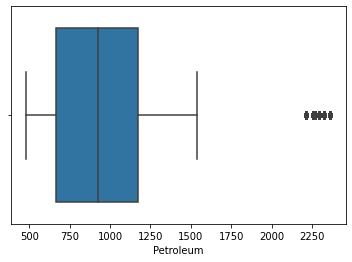

In [ ]:
sns.boxplot(x=df["Petroleum"])

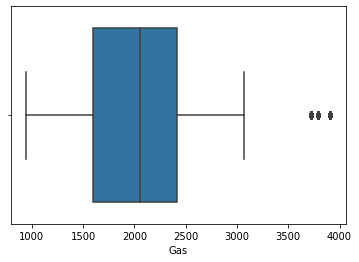

In [ ]:
sns.boxplot(x=df["Gas"])

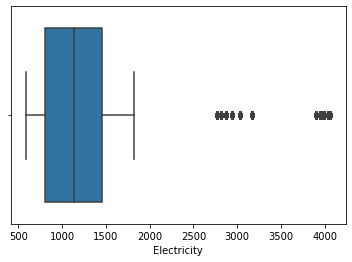

In [ ]:
sns.boxplot(x=df["Electricity"])

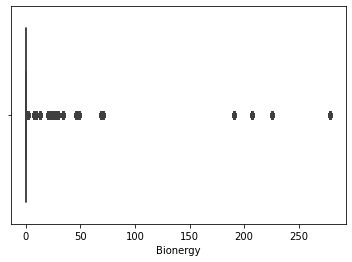

In [ ]:
sns.boxplot(x=df["Bionergy"])

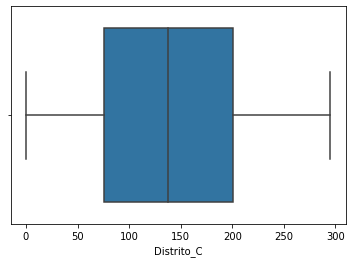

In [ ]:
sns.boxplot(x=df["Distrito_C"])

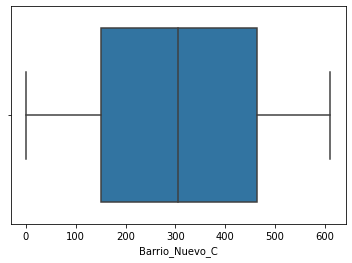

In [ ]:
sns.boxplot(x=df["Barrio_Nuevo_C"])

In [ ]:
def replace_outlier(val, mean, IRQ):
    if val < Q1 - 1.5*IRQ:
        return Q1 - 1.5*IRQ 
    elif val > Q2 + 1.5*IRQ:
        return Q2 + 1.5*IRQ
    return val

colum_outlier= df[["Easting_rounded","Northing_rounded","Ingreso_Vivienda","Area_m2","Crim_Robos","Crim_Danyo","Coal","Manufacturer","Petroleum","Gas","Electricity","Bionergy"]]

for col in colum_outlier:
   if col != "Post":
    mean = df[col].mean()
    Q1=df[col].quantile(0.25)
    Q2=df[col].quantile(0.75)
    IRQ= Q2-Q1
    df[col] = df[col].map(lambda x: replace_outlier(x, mean, IRQ)) 

for col in colum_outlier:
   if col != "Post":
    mean = df_test[col].mean()
    Q1=df_test[col].quantile(0.25)
    Q2=df_test[col].quantile(0.75)
    IRQ= Q2-Q1
    df_test[col] = df_test[col].map(lambda x: replace_outlier(x, mean, IRQ)) 


KeyError: ignored

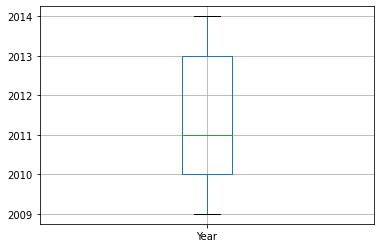

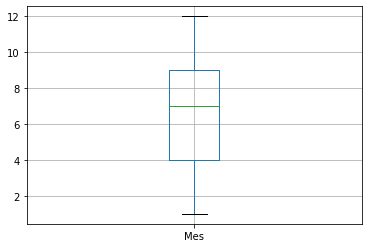

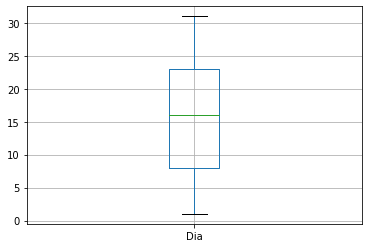

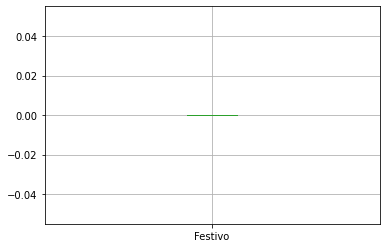

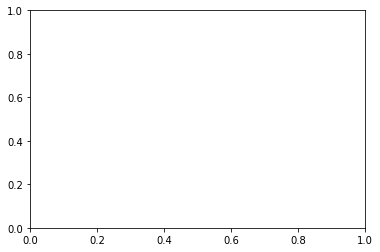

In [ ]:
#for column in df:
#  if column != "Postcode_full":
#    plt.figure()
#    df.boxplot([column])

#DATASET ALGORITMOS

In [ ]:
#Descarga del dataset
#df.to_csv('df.csv') 
#files.download('df.csv')


In [ ]:
#df = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/df.csv')
#df.head()

In [ ]:
#Descarga del dataset
#df_test.to_csv('df_test.csv') 
#files.download('df_test.csv')

In [ ]:
#df_test = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/df_test.csv')
#df_test.head()

In [ ]:
train_C=pd.DataFrame()
train=df.drop(["IncGeo_WardNameNew","Code","Postcode_district","ProperCase"], axis=1)
train_C[["IncGeo_WardNameNew","Code","Postcode_district","ProperCase"]]=df[["IncGeo_WardNameNew","Code","Postcode_district","ProperCase"]]

test_C=pd.DataFrame()
test=df_test.drop(["IncGeo_WardNameNew","Code","Postcode_district","ProperCase"], axis=1)
test_C[["IncGeo_WardNameNew","Code","Postcode_district","ProperCase"]]=df_test[["IncGeo_WardNameNew","Code","Postcode_district","ProperCase"]]

#MINERIA DE DATOS

Quitamos las variables del no supervisado

In [ ]:
#quitamos las variables del no supervisado
df_ns=train.drop(['Num_Fire',"Num_Falsa_A", "Num_Service","Postcode_full", "IncGeo_WardCode"], axis=1)
df_ns_C=train_C

In [ ]:
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469277 entries, 0 to 469276
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              469277 non-null  int64  
 1   Mes               469277 non-null  int64  
 2   Dia               469277 non-null  int64  
 3   Festivo           469277 non-null  int64  
 4   Easting_rounded   469277 non-null  float64
 5   Northing_rounded  469277 non-null  float64
 6   Ingreso_Vivienda  469277 non-null  float64
 7   Poblacion         469277 non-null  int64  
 8   Area_m2           469277 non-null  float64
 9   Crim_Violencia    469277 non-null  int64  
 10  Crim_Robos        469277 non-null  float64
 11  Crim_Robos_casas  469277 non-null  int64  
 12  Crim_Danyo        469277 non-null  float64
 13  Coal              469277 non-null  float64
 14  Manufacturer      469277 non-null  float64
 15  Petroleum         469277 non-null  float64
 16  Gas               46

##PCA

In [ ]:
#Librerias
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from matplotlib.pyplot import cm
from matplotlib.axes._axes import _log as matplotlib_axes_logger

In [ ]:
#Normalizado de los datos
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_ns)

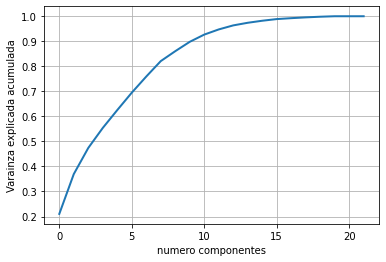

In [ ]:
#Creacion de la PCA
pca=PCA()  
pca.n_components=22  
pca_data=pca.fit_transform(features_norm)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('numero componentes') 
plt.ylabel('Varainza explicada acumulada')  
plt.show()

In [ ]:
#Aplico la PCA para 9 componentes

estimator = PCA (n_components = 9)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 
print("Explicado con nueve variables ", estimator.explained_variance_ratio_[0]+estimator.explained_variance_ratio_[1]+estimator.explained_variance_ratio_[2]+estimator.explained_variance_ratio_[3]+estimator.explained_variance_ratio_[4]+estimator.explained_variance_ratio_[5]+estimator.explained_variance_ratio_[6]+estimator.explained_variance_ratio_[7]+estimator.explained_variance_ratio_[8])

Variance Ratio:  [0.21032946 0.15921417 0.10436084 0.0798997  0.07138833 0.06942001
 0.06450781 0.06160772 0.03965124]
Explicado con nueve variables  0.8603792788352441


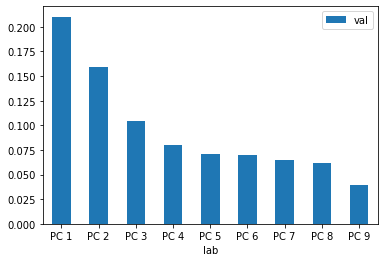

In [ ]:
#Graficamos el peso que tiene cada columna sobre el dataset
df_pca = pd.DataFrame({"lab":['PC 1', 'PC 2','PC 3', 'PC 4','PC 5','PC 6', 'PC 7','PC 8','PC 9'], "val": estimator.explained_variance_ratio_ ,})


ax = df_pca.plot.bar(x='lab', y='val', rot=0)

In [ ]:
#Creamos un dataset con el array de la PCA y las columnas creadas
df_pca = pd.DataFrame(data = X_pca
             , columns = ['principal componente 1', 'principal componente 2', 'principal componente 3',
                          'principal componente 4','principal componente 5','principal componente 6',
                          'principal componente 7','principal componente 8','principal componente 9'])

###PCA-Barrios


In [ ]:
#Creamos un dataset con la pca y anadimos la columna categorica "Code"
finalDf = pd.concat([df_pca, df_ns_C[['Code']]], axis = 1)
finalDf

principal componente 1  ...       Code
0                    -0.451293  ...  E09000002
1                    -0.434804  ...  E09000002
2                    -0.427887  ...  E09000002
3                    -0.451546  ...  E09000002
4                    -0.435712  ...  E09000002
...                        ...  ...        ...
469272                0.592634  ...  E09000015
469273               -0.545385  ...  E09000010
469274               -0.547114  ...  E09000010
469275                0.191863  ...  E09000005
469276                0.189886  ...  E09000005

[469277 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


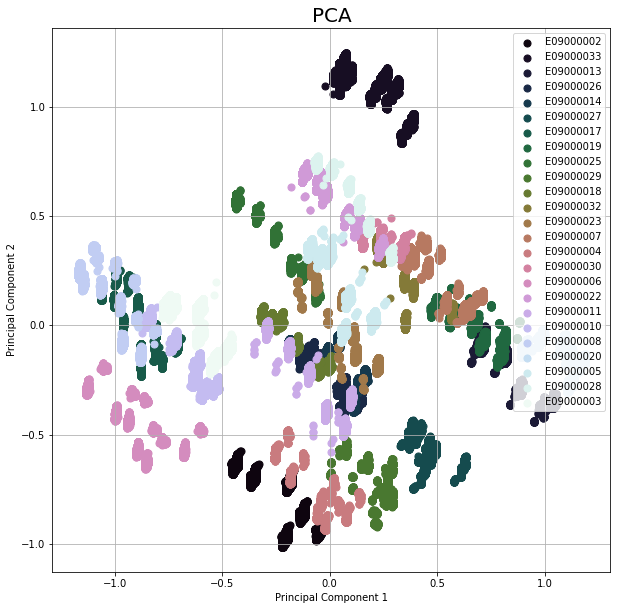

In [ ]:
#Visualizamos la PCA con los componentes 1 y 2, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


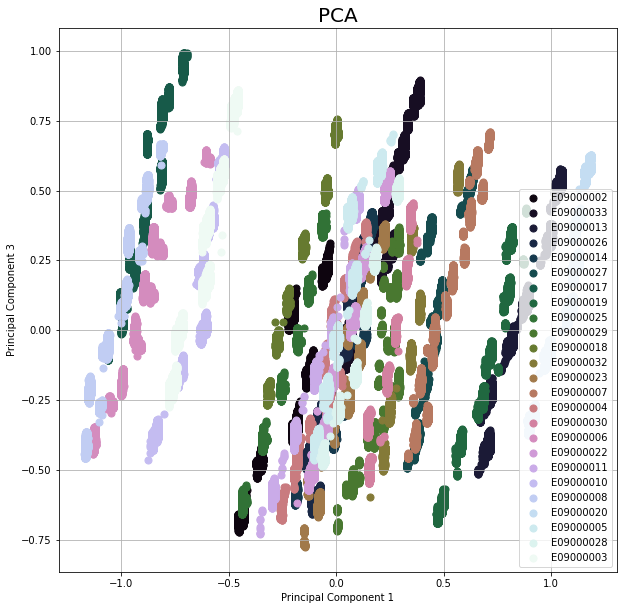

In [ ]:
#Visualizamos la PCA con los componentes 1 y 3, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


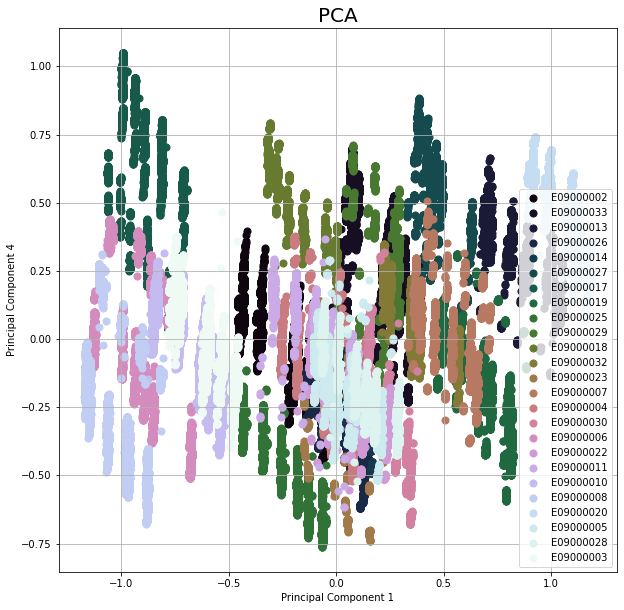

In [ ]:
#Visualizamos la PCA con los componentes 1 y 4, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


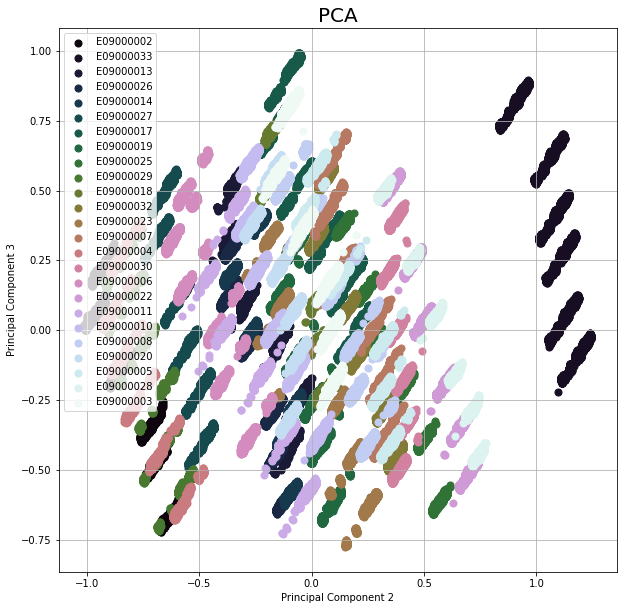

In [ ]:
#Visualizamos la PCA con los componentes 2 y 3, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


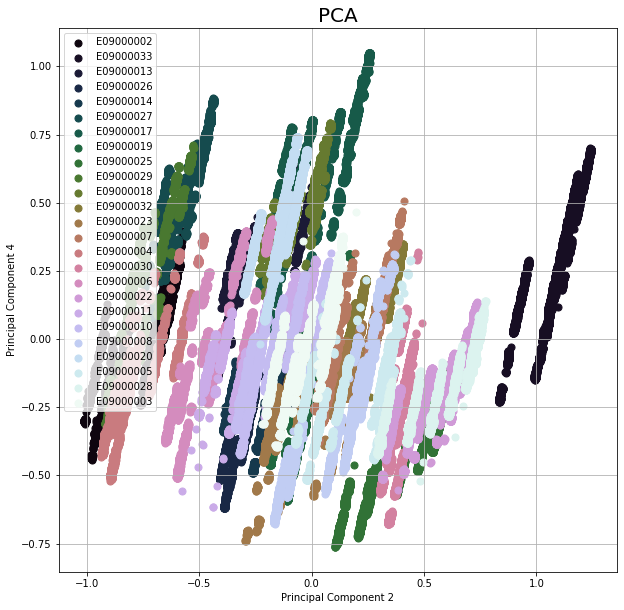

In [ ]:
#Visualizamos la PCA con los componentes 2 y 4, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

KeyError: ignored

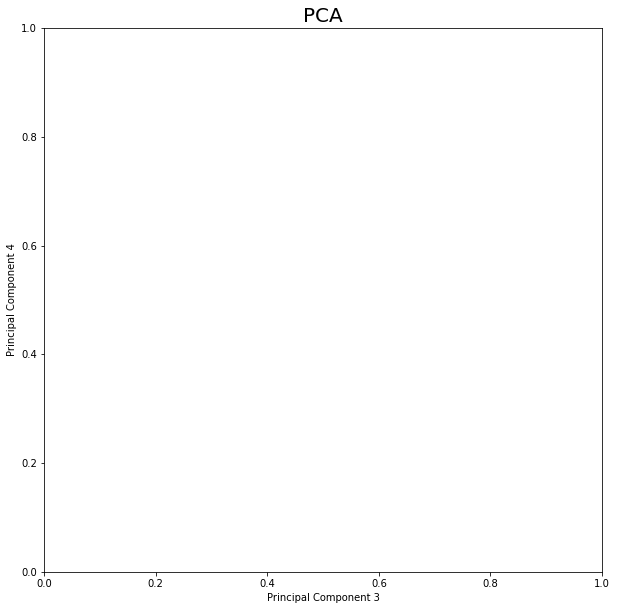

In [ ]:
#Visualizamos la PCA con los componentes 3 y 4, y etiquetamos la columna "Code"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 3']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

###PCA-Anyos


In [ ]:
finalDf = pd.concat([df_pca, df_ns[['Year']]], axis = 1)
finalDf

principal componente 1  ...  Year
0                    -0.451293  ...  2009
1                    -0.434804  ...  2009
2                    -0.427887  ...  2009
3                    -0.451546  ...  2009
4                    -0.435712  ...  2009
...                        ...  ...   ...
469272                0.592634  ...  2014
469273               -0.545385  ...  2014
469274               -0.547114  ...  2014
469275                0.191863  ...  2014
469276                0.189886  ...  2014

[469277 rows x 10 columns]

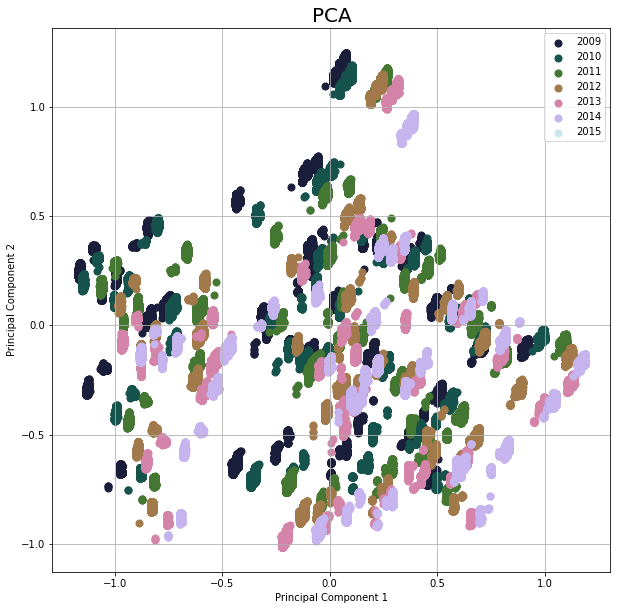

In [ ]:
#Visualizamos la PCA con los componentes 1 y 2, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

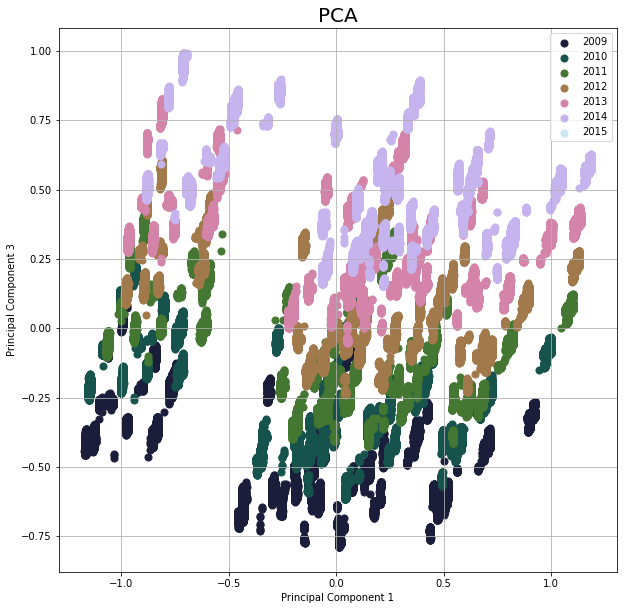

In [ ]:
#Visualizamos la PCA con los componentes 1 y 3, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

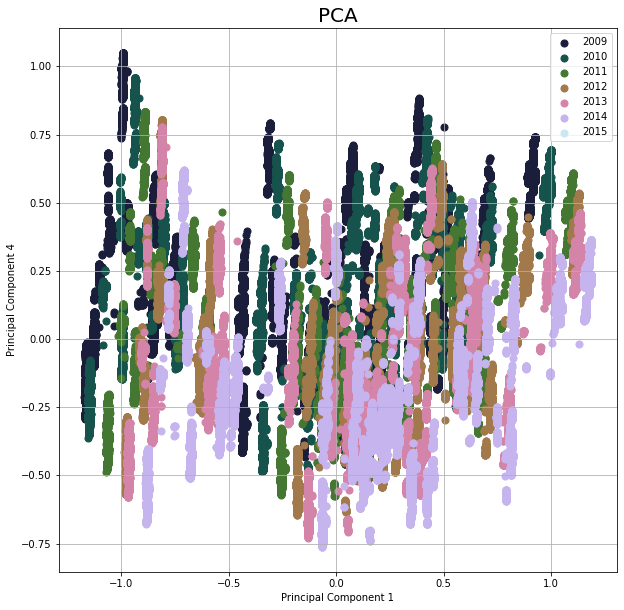

In [ ]:
#Visualizamos la PCA con los componentes 1 y 4, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

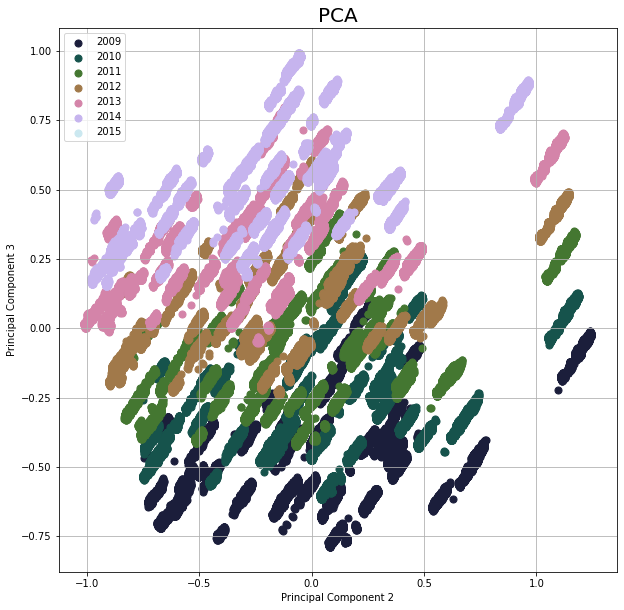

In [ ]:
#Visualizamos la PCA con los componentes 2 y 3, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

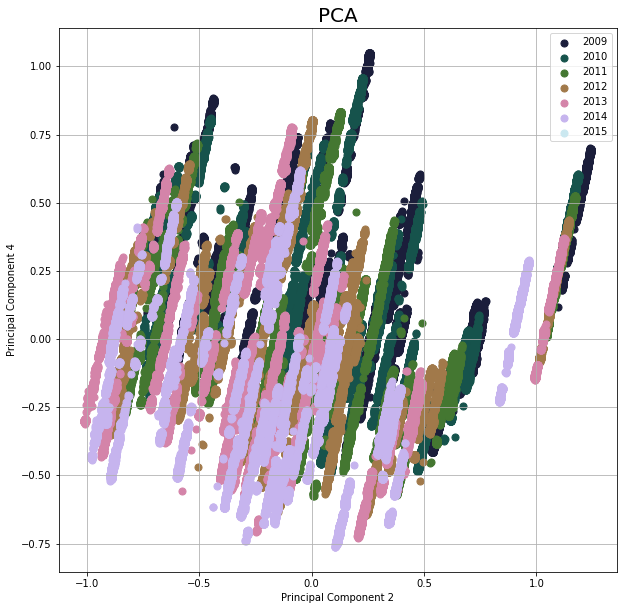

In [ ]:
#Visualizamos la PCA con los componentes 2 y 4, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

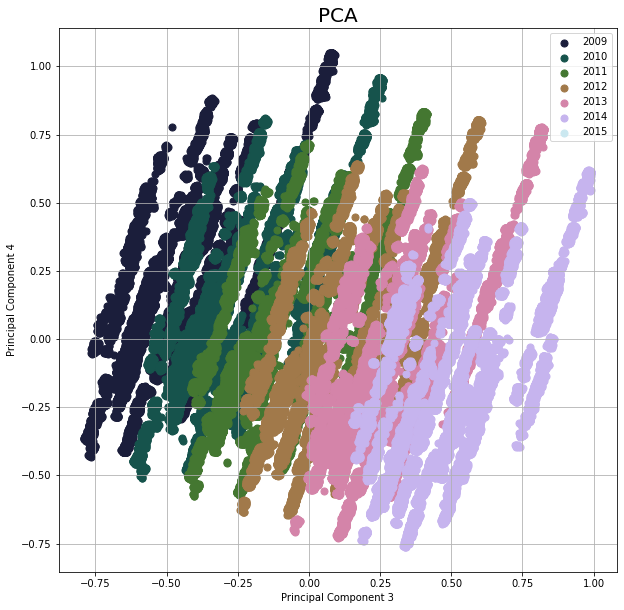

In [ ]:
#Visualizamos la PCA con los componentes 3 y 4, y etiquetamos la columna "Year"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 7)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Year'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 3']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

###PCA-Meses


In [ ]:
finalDf = pd.concat([df_pca, df_ns[['Mes']]], axis = 1)
finalDf

principal componente 1  ...  Mes
0                    -0.451293  ...    1
1                    -0.434804  ...    1
2                    -0.427887  ...    1
3                    -0.451546  ...    1
4                    -0.435712  ...    1
...                        ...  ...  ...
469272                0.592634  ...   11
469273               -0.545385  ...   11
469274               -0.547114  ...   11
469275                0.191863  ...   11
469276                0.189886  ...   11

[469277 rows x 10 columns]

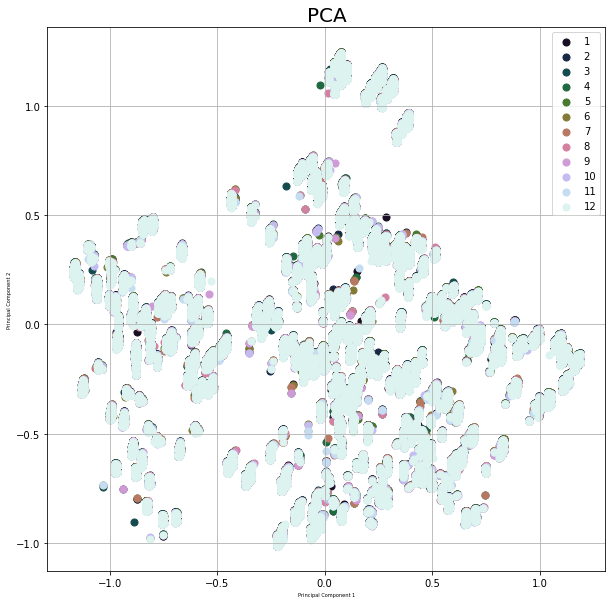

In [ ]:
#Visualizamos la PCA con los componentes 1 y 2, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 5)
ax.set_ylabel('Principal Component 2', fontsize = 5)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

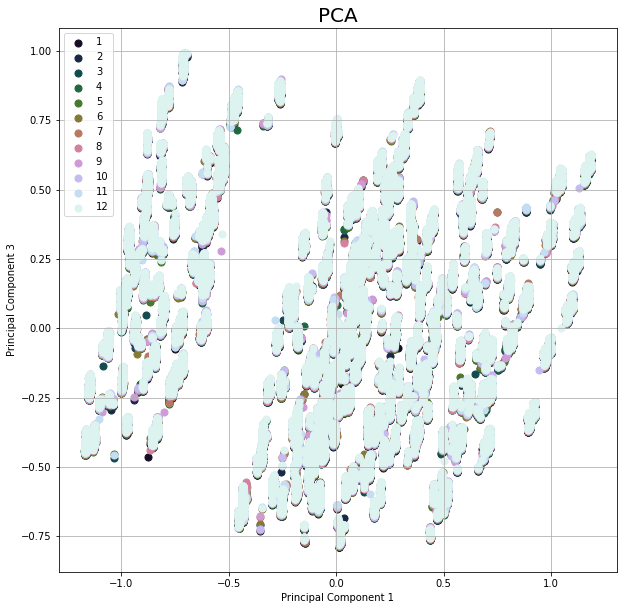

In [ ]:
#Visualizamos la PCA con los componentes 1 y 3, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

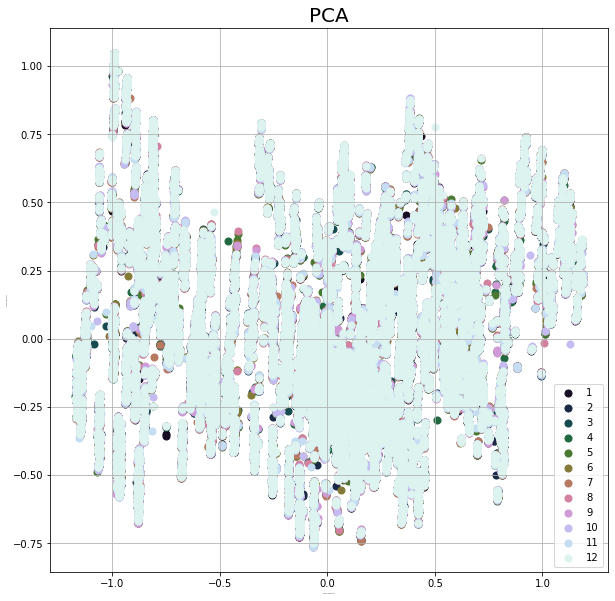

In [ ]:
#Visualizamos la PCA con los componentes 1 y 4, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 1)
ax.set_ylabel('Principal Component 4', fontsize = 1)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

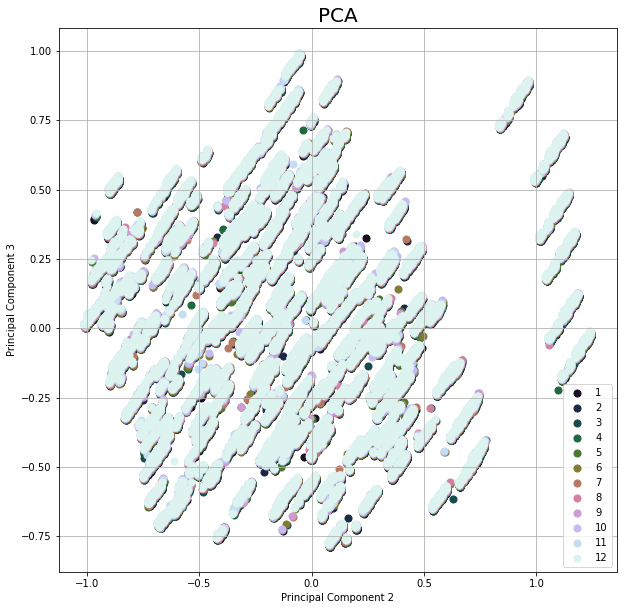

In [ ]:
#Visualizamos la PCA con los componentes 2 y 3, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

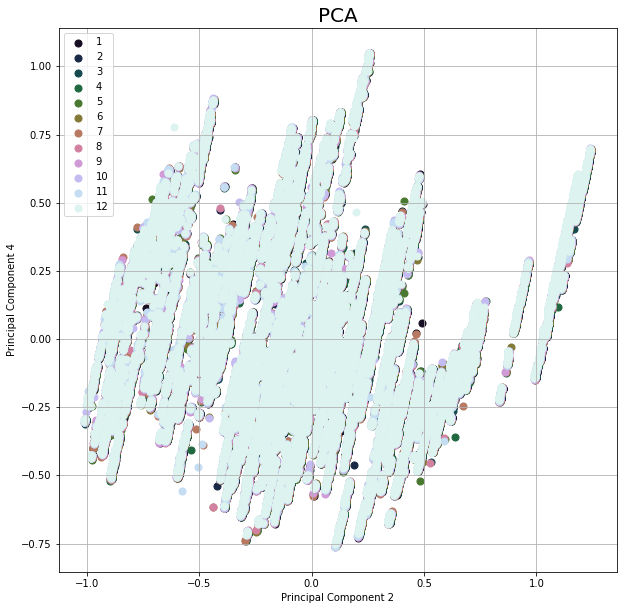

In [ ]:
#Visualizamos la PCA con los componentes 2 y 4, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

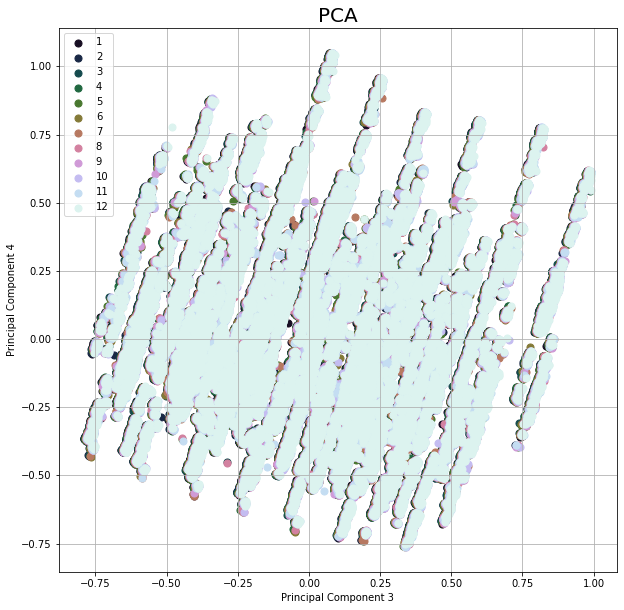

In [ ]:
#Visualizamos la PCA con los componentes 3 y 4, y etiquetamos la columna "Mes"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12]
colors = sns.color_palette("cubehelix", 12)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Mes'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 3']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

###PCA-Dias


In [ ]:
finalDf = pd.concat([df_pca, df_ns[['Dia']]], axis = 1)
finalDf

principal componente 1  ...  Dia
0                    -0.451293  ...    1
1                    -0.434804  ...    1
2                    -0.427887  ...    1
3                    -0.451546  ...    1
4                    -0.435712  ...    1
...                        ...  ...  ...
469272                0.592634  ...    3
469273               -0.545385  ...    3
469274               -0.547114  ...    3
469275                0.191863  ...    3
469276                0.189886  ...    3

[469277 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


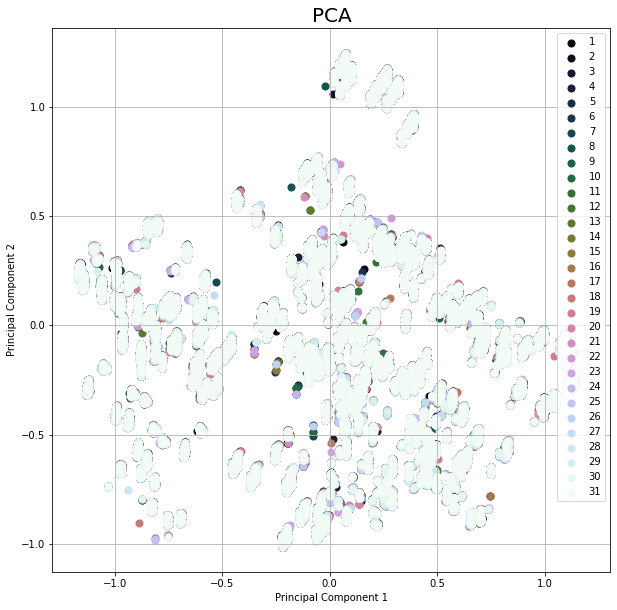

In [ ]:
#Visualizamos la PCA con los componentes 1 y 2, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 3, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 10)
#ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
#Visualizamos la PCA con los componentes 1 y 4, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 3, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 4, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 3 y 4, y etiquetamos la columna "Dias"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
colors = sns.color_palette("cubehelix", 31)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Dia'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 3']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

###PCA-Zonas dentro de los barrios


In [ ]:
finalDf = pd.concat([df_pca, df_ns_C[['Propercase']]], axis = 1)
finalDf

KeyError: ignored

In [ ]:
#Visualizamos la PCA con los componentes 1 y 2, y etiquetamos la columna "Propercase"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = [2009,2010,2011,2012,2013,2014,2015]
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Propercase'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 3, y etiquetamos la columna "Propercase"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 1 y 4, y etiquetamos la columna "Propercase"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 1']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 3, y etiquetamos la columna "Propercase"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 2 y 4, y etiquetamos la columna "Propercase"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 2']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Visualizamos la PCA con los componentes 3 y 4, y etiquetamos la columna "Propercase"
matplotlib_axes_logger.setLevel('ERROR')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 10)
ax.set_ylabel('Principal Component 4', fontsize = 10)
ax.set_title('PCA', fontsize = 20)
targets = ['E09000002', 'E09000033', 'E09000013', 'E09000026', 'E09000014',
       'E09000027', 'E09000017', 'E09000019', 'E09000025', 'E09000029',
       'E09000018', 'E09000032', 'E09000023', 'E09000007', 'E09000004',
       'E09000030', 'E09000006', 'E09000022', 'E09000011', 'E09000010',
       'E09000008', 'E09000020', 'E09000005', 'E09000028', 'E09000003',
       'E09000021', 'E09000031', 'E09000015', 'E09000012', 'E09000016',
       'E09000024', 'E09000009']
colors = sns.color_palette("cubehelix", 25)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal componente 3']
               , finalDf.loc[indicesToKeep, 'principal componente 4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

##METODOS PROBABILISTICOS


In [ ]:
from sklearn.mixture import GaussianMixture

###PCA

In [ ]:
#Cargamos el dataset de la PCA
X=X_pca


Probamos la gausiana con las componentes 0 e 1 de la PCA

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

Probamos la gausiana con las componentes 0 e 2 de la PCA

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 0], X[:, 2], c=labels, s=40, cmap='viridis');


Probamos la gausiana con las componentes 0 e 3 de la PCA

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 0], X[:, 3], c=labels, s=40, cmap='viridis');

Probamos la gausiana con las componentes 1 e 2 de la PCA

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

Probamos la gausiana con las componentes 1 e 3 de la PCA

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 1], X[:, 3], c=labels, s=40, cmap='viridis');

Probamos la gausiana con las componentes 2 e 3 de la PCA

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 2], X[:, 3], c=labels, s=40, cmap='viridis');

Busqueda del numero de cluster optimos

In [ ]:

n_components = np.arange(1, 8)
models = [GaussianMixture(n).fit(X) for n in n_components]

aics = [model.fit(X).aic(X ) for model in models]
plt.plot(n_components, aics);

Reparto de la probabilidad entre los diferentes cluster

In [ ]:
probs = gmm.predict_proba(X)
print(probs[25:35].round(3))

###TODO EL DATASET

Metodos probabilisticos toda el data set

In [ ]:
X=df_ns.Values

Normalizamos el dataset

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(X)

Probamos la gausiana con las componentes 0 y 1 

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

Probamos la gausiana con las componentes 0 y 2 

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 0], X[:, 2], c=labels, s=40, cmap='viridis');


Probamos la gausiana con las componentes 0 y 3

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 0], X[:, 3], c=labels, s=40, cmap='viridis');

Probamos la gausiana con las componentes 1 y 2 

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

Probamos la gausiana con las componentes 1 y 3

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 1], X[:, 3], c=labels, s=40, cmap='viridis');

Probamos la gausiana con las componentes 3 y 4

In [ ]:
gmm = GaussianMixture(n_components=2).fit(X)

labels = gmm.predict(X)


plt.scatter(X[:, 3], X[:, 4], c=labels, s=40, cmap='viridis');

Busqueda del numero de cluster optimos

In [ ]:

n_components = np.arange(1, 40)
models = [GaussianMixture(n).fit(X) for n in n_components]

aics = [model.fit(X).aic(X ) for model in models]
plt.plot(n_components, aics);

Reparto de la probabilidad entre los diferentes cluster

In [ ]:
probs = gmm.predict_proba(X)
print(probs[25:35].round(3))

##KMEANS

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics


In [ ]:
df_km=df_pca

# utilizamos k-means para hacer el clustering




In [ ]:

kmeans = KMeans(n_clusters=2, random_state=0)

clusters = kmeans.fit_predict(df_km)

kmeans.cluster_centers_.shape

In [ ]:
df_k1['cl'] = kmeans.labels_
df_k1.plot.scatter("principal componente 1", "principal componente 2", c='cl', colormap='gist_rainbow')

In [ ]:
#Con la silueta voy a buscar cual es el numero de cluster mas favorables 
distortions = []
silhouettes = []

for i in range(2, 30):
    km = KMeans(i, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=42)
    clustering = km.fit_predict(df_k1)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(df_pca, clustering))

In [ ]:
plt.plot(range(2,30), distortions, marker='o')
plt.xticks(range(2, 30))
plt.xlabel('K')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=9, random_state=0)

clusters = kmeans.fit_predict(df_pca)

kmeans.cluster_centers_.shape

df_pca['cl'] = kmeans.labels_
df_pca.plot.scatter("principal componente 1", "principal componente 2", c='cl', colormap='gist_rainbow')

##DOWNNLOAD PCA

In [ ]:
from google.colab import files
df_PCA.to_csv('df_PCA.csv') 
files.download('df_PCA.csv')

#ALGORITMOS MACHINE LEARNING

#OPTIMIZACION DE PARAMETROS

#RESULTADOS